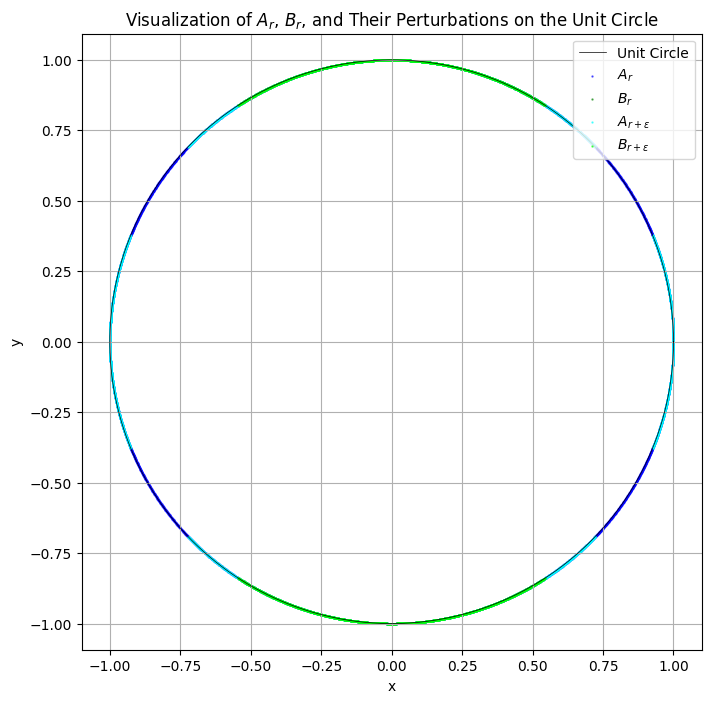

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions f1 and f2
def f1(theta):
    # Avoid division by zero
    theta = np.where(theta == 0, 1e-6, theta)
    result = np.arcsin(np.sin(theta)) + (np.pi / 2) * np.exp(-np.pi / (2 * theta))
    return result

def f2(theta):
    # Avoid division by zero
    theta = np.where(theta == 0, 1e-6, theta)
    result = np.arcsin(np.cos(theta)) + (np.pi / 2) * np.exp(-np.pi / (2 * theta))
    return result

# Generate points on the unit circle
num_points = 5000
theta = np.linspace(0, 2 * np.pi, num_points)
x = np.cos(theta)
y = np.sin(theta)

# Define r and small perturbation epsilon
r = 0.8  # You can adjust r as needed
epsilon = 0.05  # Small perturbation

# Initialize lists to hold points
A_r_x, A_r_y = [], []
B_r_x, B_r_y = [], []
A_r_plus_epsilon_x, A_r_plus_epsilon_y = [], []
B_r_plus_epsilon_x, B_r_plus_epsilon_y = [], []

for xi, yi in zip(x, y):
    # Calculate radii with and without perturbation
    r_xi = r * np.abs(xi)
    r_yi = r * np.abs(yi)
    r_plus_epsilon_xi = (r + epsilon) * np.abs(xi)
    r_plus_epsilon_yi = (r + epsilon) * np.abs(yi)

    # Conditions for A_r
    if 0 <= r_xi <= 1:
        arcsin_xi = np.arcsin(np.abs(xi))
        arcsin_r_xi = np.arcsin(r_xi)
        if arcsin_xi >= f1(arcsin_r_xi):
            A_r_x.append(xi)
            A_r_y.append(yi)

    # Conditions for B_r
    if 0 <= r_yi <= 1:
        arcsin_yi = np.arcsin(np.abs(yi))
        arcsin_r_yi = np.arcsin(r_yi)
        if arcsin_yi >= f2(arcsin_r_yi):
            B_r_x.append(xi)
            B_r_y.append(yi)

    # Conditions for A_{r + epsilon}
    if 0 <= r_plus_epsilon_xi <= 1:
        arcsin_plus_epsilon_xi = np.arcsin(np.abs(xi))
        arcsin_r_plus_epsilon_xi = np.arcsin(r_plus_epsilon_xi)
        if arcsin_plus_epsilon_xi >= f1(arcsin_r_plus_epsilon_xi):
            A_r_plus_epsilon_x.append(xi)
            A_r_plus_epsilon_y.append(yi)

    # Conditions for B_{r + epsilon}
    if 0 <= r_plus_epsilon_yi <= 1:
        arcsin_plus_epsilon_yi = np.arcsin(np.abs(yi))
        arcsin_r_plus_epsilon_yi = np.arcsin(r_plus_epsilon_yi)
        if arcsin_plus_epsilon_yi >= f2(arcsin_r_plus_epsilon_yi):
            B_r_plus_epsilon_x.append(xi)
            B_r_plus_epsilon_y.append(yi)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the unit circle
ax.plot(x, y, 'k-', linewidth=0.5, label='Unit Circle')

# Plot A_r and B_r
ax.scatter(A_r_x, A_r_y, color='blue', s=0.5, alpha=0.6, label='$A_r$')
ax.scatter(B_r_x, B_r_y, color='green', s=0.5, alpha=0.6, label='$B_r$')

# Plot A_{r + epsilon} and B_{r + epsilon}
ax.scatter(A_r_plus_epsilon_x, A_r_plus_epsilon_y, color='cyan', s=0.5, alpha=0.6, label='$A_{r + \epsilon}$')
ax.scatter(B_r_plus_epsilon_x, B_r_plus_epsilon_y, color='lime', s=0.5, alpha=0.6, label='$B_{r + \epsilon}$')

# Customize the plot
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Visualization of $A_r$, $B_r$, and Their Perturbations on the Unit Circle')
ax.axis('equal')
ax.grid(True)
ax.legend(loc='upper right')

# Display the plot
plt.show()

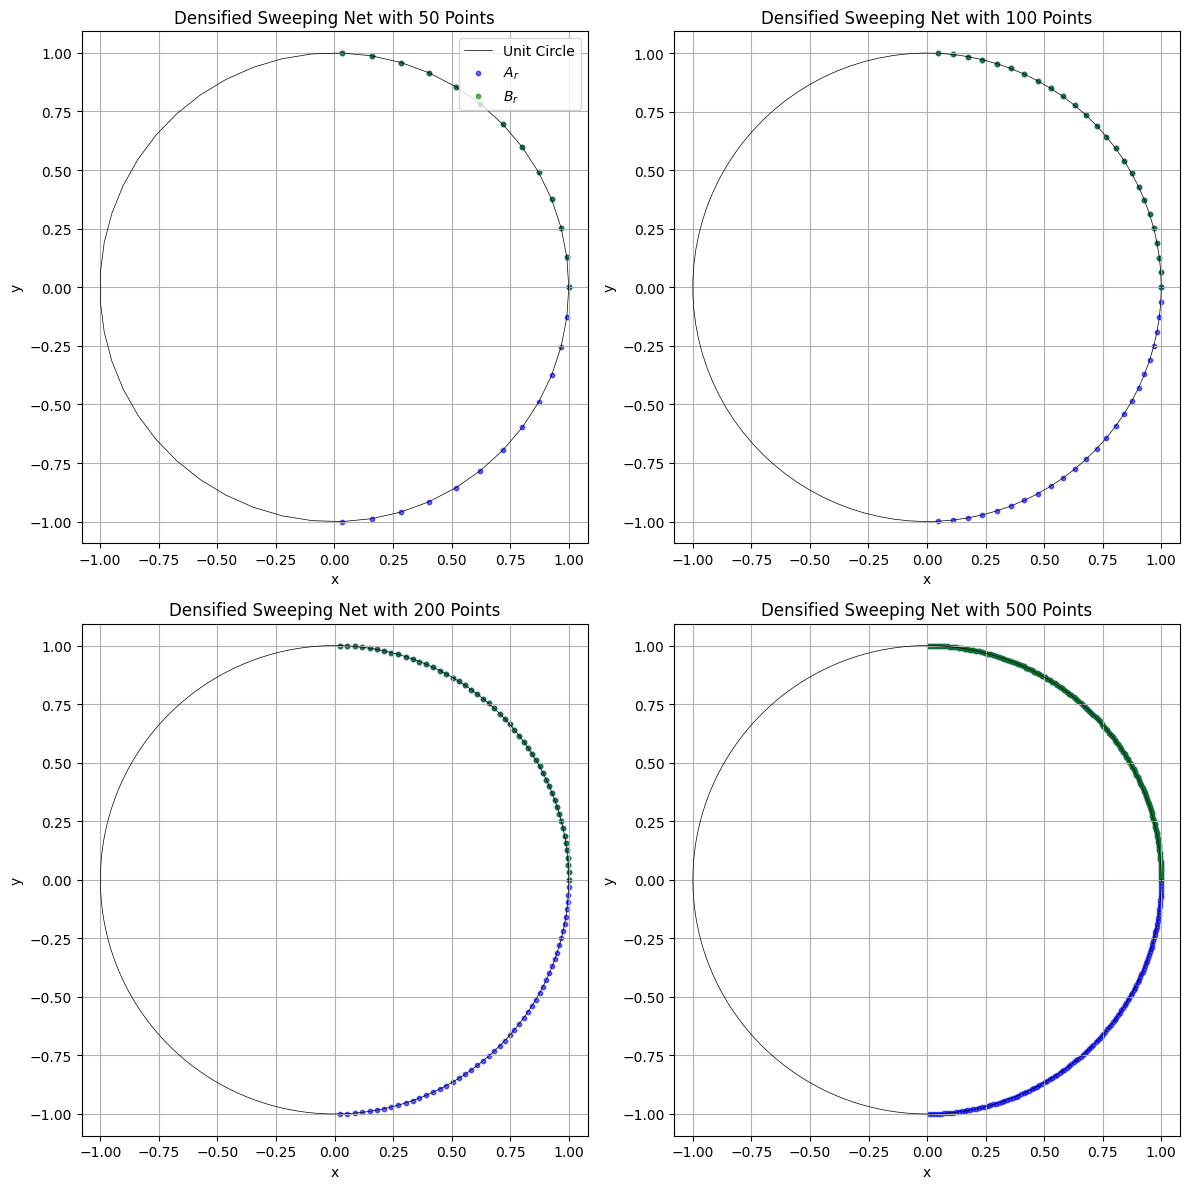

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions f1 and f2
def f1(theta):
    # Avoid division by zero
    theta = np.where(theta == 0, 1e-6, theta)
    result = theta + (np.pi / 2) * (1 - (np.pi / (2 * theta)))
    return result

def f2(theta):
    # Avoid division by zero
    theta = np.where(theta == 0, 1e-6, theta)
    result = np.arccos(np.sin(theta)) + (np.pi / 2) * (1 - (np.pi / (2 * theta)))
    return result

# Define r
r = 0.8  # Adjust as needed

# List of mesh sizes (number of points)
mesh_sizes = [50, 100, 200, 500]

fig, axs = plt.subplots(2, 2, figsize=(12,12))
axs = axs.ravel()

for idx, num_points in enumerate(mesh_sizes):
    # Generate points on the unit circle
    theta_vals = np.linspace(0, 2 * np.pi, num_points)
    x = np.cos(theta_vals)
    y = np.sin(theta_vals)

    # Initialize lists to hold points
    A_r_x, A_r_y = [], []
    B_r_x, B_r_y = [], []

    for xi, yi in zip(x, y):
        # Only consider points in the right half of the circle (x >= 0)
        if xi >= 0:
            # Calculate arcsin values
            arcsin_xi = np.arcsin(np.clip(xi, -1, 1))
            arcsin_ri_xi = np.arcsin(np.clip(r * xi, -1, 1))
            arcsin_yi = np.arcsin(np.clip(yi, -1, 1))
            arcsin_ri_yi = np.arcsin(np.clip(r * yi, -1, 1))

            # Conditions for A_r
            if arcsin_xi >= f1(arcsin_ri_xi):
                A_r_x.append(xi)
                A_r_y.append(yi)

            # Conditions for B_r
            if arcsin_yi >= f2(arcsin_ri_yi):
                B_r_x.append(xi)
                B_r_y.append(yi)

    # Plotting
    ax = axs[idx]
    # Plot the unit circle
    ax.plot(x, y, 'k-', linewidth=0.5, label='Unit Circle')
    # Plot A_r and B_r
    ax.scatter(A_r_x, A_r_y, color='blue', s=10, alpha=0.6, label='$A_r$')
    ax.scatter(B_r_x, B_r_y, color='green', s=10, alpha=0.6, label='$B_r$')
    # Customize the plot
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Densified Sweeping Net with {num_points} Points')
    ax.axis('equal')
    ax.grid(True)
    if idx == 0:
        ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

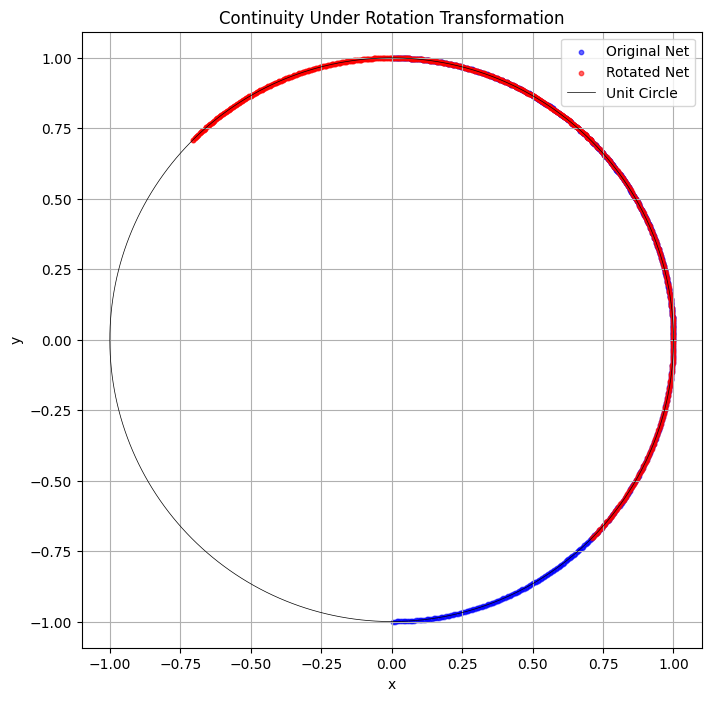

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions f1 and f2
def f1(theta):
    # Avoid division by zero
    theta = np.where(theta == 0, 1e-6, theta)
    result = theta + (np.pi / 2) * (1 - (np.pi / (2 * theta)))
    return result

def f2(theta):
    # Avoid division by zero
    theta = np.where(theta == 0, 1e-6, theta)
    result = np.arccos(np.sin(theta)) + (np.pi / 2) * (1 - (np.pi / (2 * theta)))
    return result

# Define r
r = 0.8

# Generate points on the unit circle
num_points = 1000
theta_vals = np.linspace(0, 2 * np.pi, num_points)
x = np.cos(theta_vals)
y = np.sin(theta_vals)

# Initialize lists to hold points
A_r_x, A_r_y = [], []
B_r_x, B_r_y = [], []

for xi, yi in zip(x, y):
    # Only consider points in the right half of the circle (x >= 0)
    if xi >= 0:
        # Calculate arcsin values
        arcsin_xi = np.arcsin(np.clip(xi, -1, 1))
        arcsin_ri_xi = np.arcsin(np.clip(r * xi, -1, 1))
        arcsin_yi = np.arcsin(np.clip(yi, -1, 1))
        arcsin_ri_yi = np.arcsin(np.clip(r * yi, -1, 1))

        # Conditions for A_r
        if arcsin_xi >= f1(arcsin_ri_xi):
            A_r_x.append(xi)
            A_r_y.append(yi)

        # Conditions for B_r
        if arcsin_yi >= f2(arcsin_ri_yi):
            B_r_x.append(xi)
            B_r_y.append(yi)

# Combine A_r and B_r
net_x = A_r_x + B_r_x
net_y = A_r_y + B_r_y

# Apply rotation transformation
alpha = np.pi / 4  # 45 degrees
cos_alpha = np.cos(alpha)
sin_alpha = np.sin(alpha)

rotated_x = [xi * cos_alpha - yi * sin_alpha for xi, yi in zip(net_x, net_y)]
rotated_y = [xi * sin_alpha + yi * cos_alpha for xi, yi in zip(net_x, net_y)]

# Plotting
plt.figure(figsize=(8,8))

# Plot the original net
plt.scatter(net_x, net_y, color='blue', s=10, alpha=0.6, label='Original Net')

# Plot the rotated net
plt.scatter(rotated_x, rotated_y, color='red', s=10, alpha=0.6, label='Rotated Net')

# Plot the unit circle
plt.plot(x, y, 'k-', linewidth=0.5, label='Unit Circle')

# Customize the plot
plt.xlabel('x')
plt.ylabel('y')
plt.title('Continuity Under Rotation Transformation')
plt.axis('equal')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

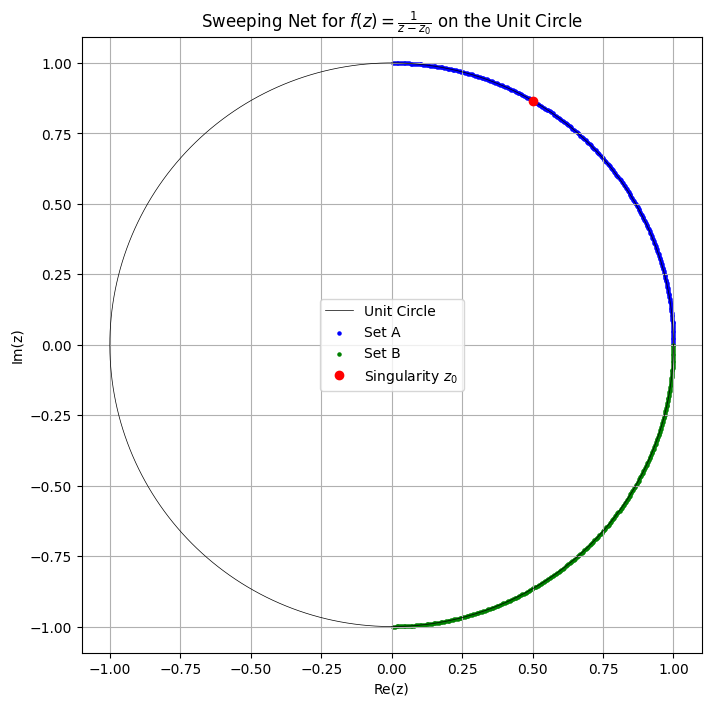

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the complex function f(z)
def f(z):
    return 1 / (z - z0)

# Singular point on the unit circle
theta0 = np.pi / 3  # Adjust as needed
z0 = np.exp(1j * theta0)

# Define the sweeping net
# Avoid theta = 0 and theta = 2*pi to prevent division by zero
epsilon = 1e-8  # Small value to offset theta from 0 and 2*pi
theta = np.linspace(epsilon, 2 * np.pi - epsilon, 1000)

z = np.exp(1j * theta)
fz = f(z)

# Compute the argument of f(z)
arg_fz = np.angle(fz)

# Define the threshold functions F1 and F2
# Use np.where to safely handle division
F1 = np.zeros_like(theta)
F2 = np.zeros_like(theta)

# For theta in (0, pi], compute F1
theta1_indices = (theta > 0) & (theta <= np.pi)
theta1 = theta[theta1_indices]
F1[theta1_indices] = arg_fz[theta1_indices] + (np.pi / 2) * (1 - (np.pi / (2 * theta1)))

# For theta in [pi, 2*pi), compute F2
theta2_indices = (theta >= np.pi) & (theta < 2 * np.pi)
theta2 = theta[theta2_indices]
F2[theta2_indices] = arg_fz[theta2_indices] + (np.pi / 2) * (1 - (np.pi / (2 * (2 * np.pi - theta2))))

# Define the sets A and B
A_indices = theta1_indices & (arg_fz >= F1)
B_indices = theta2_indices & (arg_fz >= F2)

# Create the plot
plt.figure(figsize=(8, 8))
plt.plot(np.real(z), np.imag(z), 'k-', linewidth=0.5, label='Unit Circle')
plt.scatter(np.real(z[A_indices]), np.imag(z[A_indices]), color='blue', s=5, label='Set A')
plt.scatter(np.real(z[B_indices]), np.imag(z[B_indices]), color='green', s=5, label='Set B')
plt.plot(np.real(z0), np.imag(z0), 'ro', label='Singularity $z_0$')

plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('Sweeping Net for $f(z) = \\frac{1}{z - z_0}$ on the Unit Circle')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()

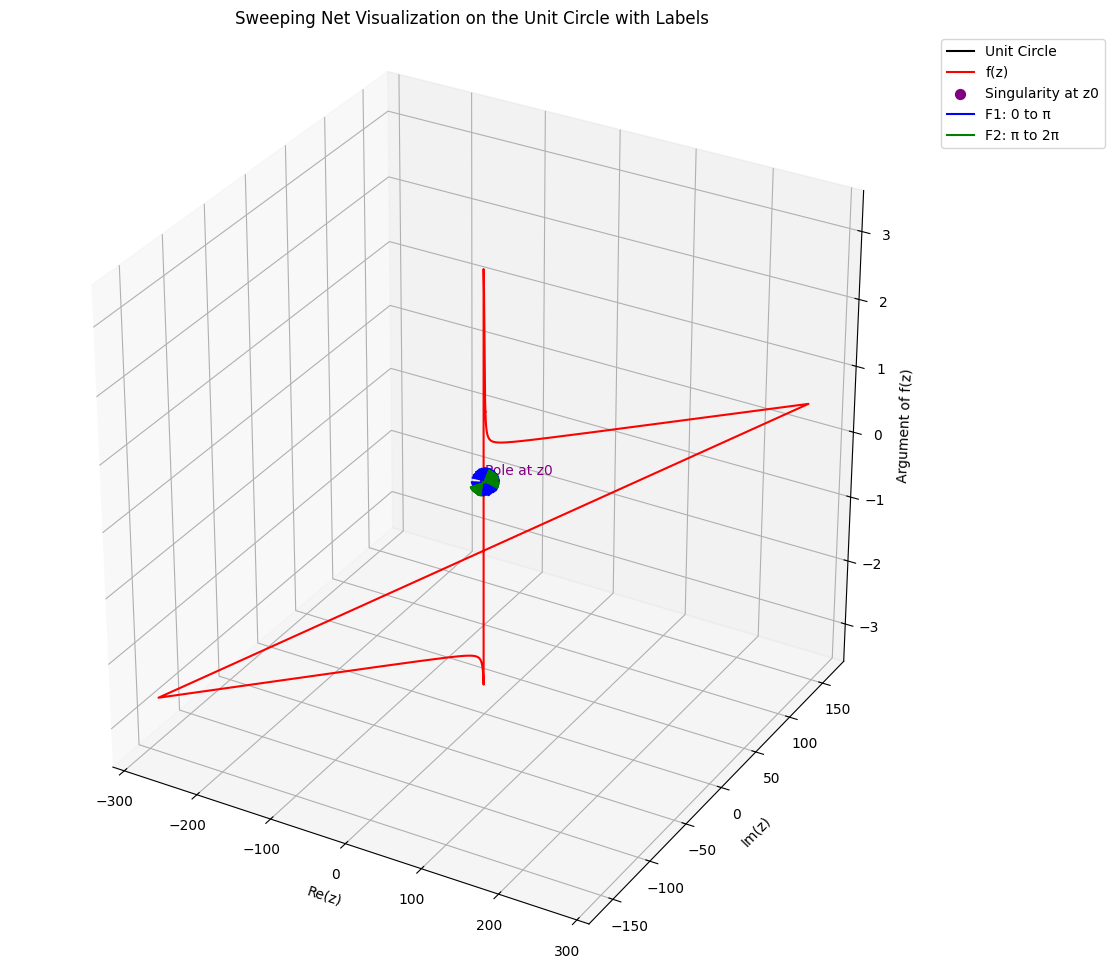

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d
from matplotlib.patches import FancyArrowPatch

# Define a class for 3D arrows
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        return np.min(zs)

# Define the complex function with a singularity at z0 on the unit circle
z0 = np.exp(1j * np.pi / 3)  # Example singularity at e^(i*pi/3)
def f(z):
    return 1 / (z - z0)

# Parametrization of the unit circle
theta = np.linspace(0, 2*np.pi, 1000)
z = np.exp(1j * theta)

# Evaluate f on the unit circle
fz = f(z)

# Compute arguments for visualization
arg_fz = np.angle(fz)

# Define F1 and F2 functions for sweeping net visualization
epsilon = 1e-10  # To avoid division by zero
F1 = arg_fz + np.pi/2 * (1 - np.pi / (2 * np.maximum(theta, epsilon)))
F2 = arg_fz + np.pi/2 * (1 - np.pi / (2 * np.maximum(2*np.pi - theta, epsilon)))

# Visualization setup
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot the unit circle in 3D
ax.plot(np.cos(theta), np.sin(theta), np.zeros_like(theta), 'k-', label='Unit Circle')

# Plot the function values in 3D
ax.plot(np.real(fz), np.imag(fz), arg_fz, 'r-', label='f(z)')

# Plot arrows representing F1 and F2
for t in np.linspace(0, np.pi, 50):
    z_t = np.exp(1j * t)
    end_x, end_y = np.real(z_t) + 0.1*np.cos(F1[int(t/2/np.pi*1000)]), np.imag(z_t) + 0.1*np.sin(F1[int(t/2/np.pi*1000)])
    a = Arrow3D([np.real(z_t), end_x], [np.imag(z_t), end_y], [0, 0],
                mutation_scale=20, lw=1, arrowstyle="-|>", color="blue")
    ax.add_artist(a)

for t in np.linspace(np.pi, 2*np.pi, 50):
    z_t = np.exp(1j * t)
    end_x, end_y = np.real(z_t) + 0.1*np.cos(F2[int((t-np.pi)/2/np.pi*1000)]), np.imag(z_t) + 0.1*np.sin(F2[int((t-np.pi)/2/np.pi*1000)])
    a = Arrow3D([np.real(z_t), end_x], [np.imag(z_t), end_y], [0, 0],
                mutation_scale=20, lw=1, arrowstyle="-|>", color="green")
    ax.add_artist(a)

# Adding the singularity marker
ax.scatter(np.real(z0), np.imag(z0), 0, color='purple', s=50, label='Singularity at z0')

# Labelling the singularity
ax.text(np.real(z0), np.imag(z0), 0.1, "Pole at z0", color='purple')

# Aesthetics for the plot
ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')
ax.set_zlabel('Argument of f(z)')
ax.set_title('Sweeping Net Visualization on the Unit Circle with Labels')
ax.legend()

# Add legend for blue and green arrows
ax.plot([], [], color='blue', label='F1: 0 to π')
ax.plot([], [], color='green', label='F2: π to 2π')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Equal aspect ratio for proper visualization
ax.set_box_aspect((1,1,1))

plt.show()

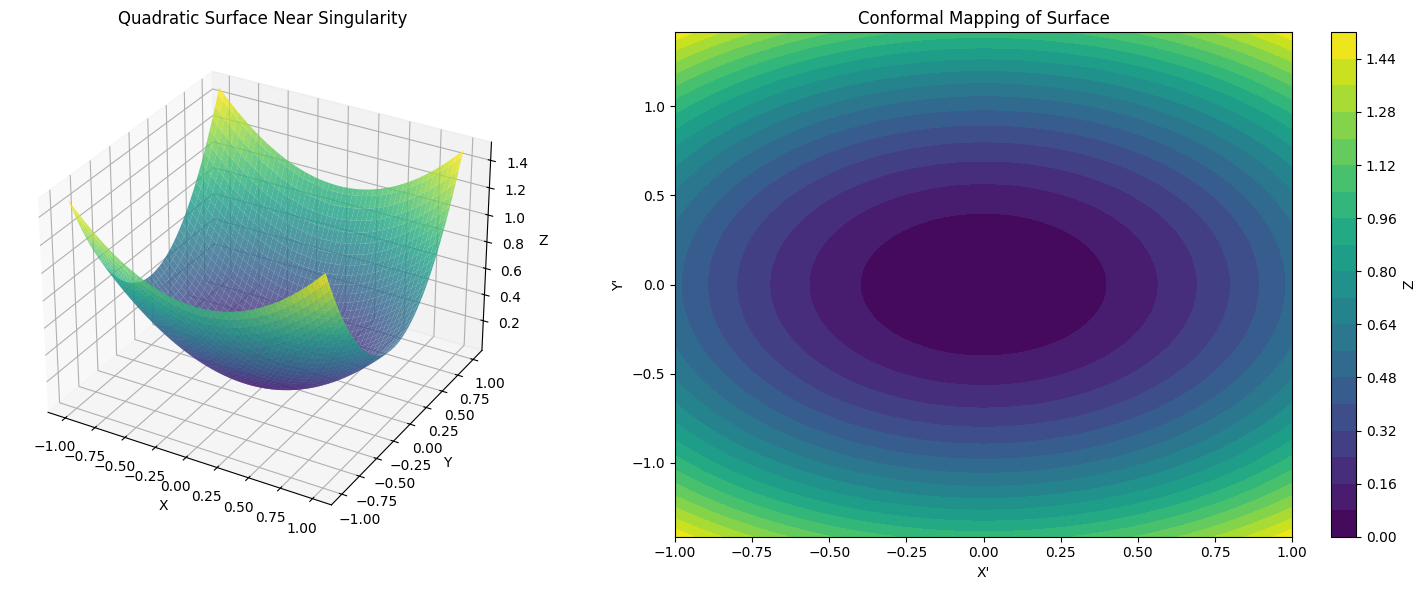

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def quadratic_surface(x, y, lambdas, x0):
    """Create a quadratic surface based on given eigenvalues (lambdas) and center (x0)."""
    return 0.5 * (lambdas[0] * (x - x0[0])**2 + lambdas[1] * (y - x0[1])**2)

def conformal_mapping(x, y, lambdas):
    """Apply the conformal mapping to the coordinates."""
    return np.sqrt(np.abs(lambdas[0])) * x, np.sqrt(np.abs(lambdas[1])) * y

# Define parameters
lambdas = [1.0, 2.0]  # Eigenvalues of the Hessian at the singularity, for simplicity, we take 2D case
x0, y0 = 0, 0  # Singularity at origin

# Create grid
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

# Compute Z correctly using vectorized operations
Z = quadratic_surface(X, Y, lambdas, (x0, y0))

# Apply conformal mapping
X_conformal, Y_conformal = conformal_mapping(X - x0, Y - y0, lambdas)

# Plotting
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

# Original surface
ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)
ax1.set_title('Quadratic Surface Near Singularity')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Conformal mapping in 2D
c = ax2.contourf(X_conformal + x0, Y_conformal + y0, Z, levels=20, cmap='viridis')
ax2.set_title('Conformal Mapping of Surface')
ax2.set_xlabel('X\'')
ax2.set_ylabel('Y\'')
plt.colorbar(c, label='Z')

# Show the plots
plt.tight_layout()
plt.show()

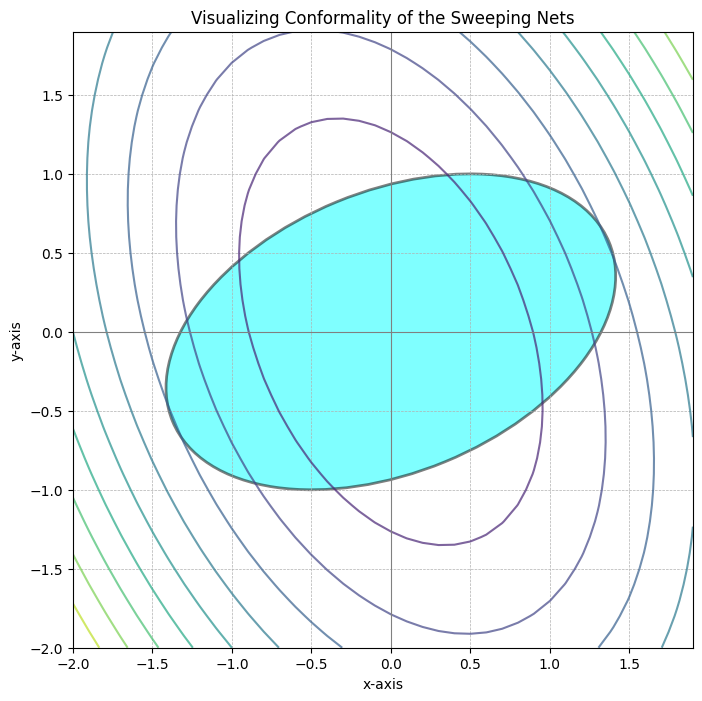

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def quadratic_approximation(hessian, center, grid_size=0.1, extent=[-2, 2]):
    """ Generate a quadratic surface given a Hessian matrix and center """
    x = np.arange(extent[0], extent[1], grid_size)
    y = np.arange(extent[0], extent[1], grid_size)
    X, Y = np.meshgrid(x, y)

    # Quadratic form based on the Hessian
    Z = 0.5 * (hessian[0, 0] * (X-center[0])**2 + 2 * hessian[0, 1] * (X-center[0]) * (Y-center[1]) + hessian[1, 1] * (Y-center[1])**2)

    return X, Y, Z

def plot_ellipse(hessian, center, ax, color="b", alpha=0.3):
    """ Plot the ellipse corresponding to level curves of the quadratic form """
    # Eigenvalues and eigenvectors for the Hessian
    eigenvalues, eigenvectors = np.linalg.eigh(hessian)
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))  # Angle of rotation in degrees

    # Ellipse parameters
    width, height = 2 * np.sqrt(eigenvalues)
    ellipse = Ellipse(xy=center, width=width, height=height, angle=angle, edgecolor='black', facecolor=color, lw=2, alpha=alpha)
    ax.add_patch(ellipse)

def main():
    center = np.array([0.0, 0.0])
    hessian = np.array([[2.0, 0.5], [0.5, 1.0]])  # Example Hessian matrix

    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot the quadratic approximation surface
    X, Y, Z = quadratic_approximation(hessian, center)
    contour = ax.contour(X, Y, Z, levels=10, cmap='viridis', alpha=0.7)

    # Plot ellipses that represent different level curves
    plot_ellipse(hessian, center, ax, color='cyan', alpha=0.5)

    ax.set_title("Visualizing Conformality of the Sweeping Nets")
    ax.set_xlabel("x-axis")
    ax.set_ylabel("y-axis")
    ax.axvline(0, color='grey', lw=0.8)
    ax.axhline(0, color='grey', lw=0.8)
    ax.grid(True, which='both', linestyle='--', lw=0.5)

    plt.show()

if __name__ == "__main__":
    main()

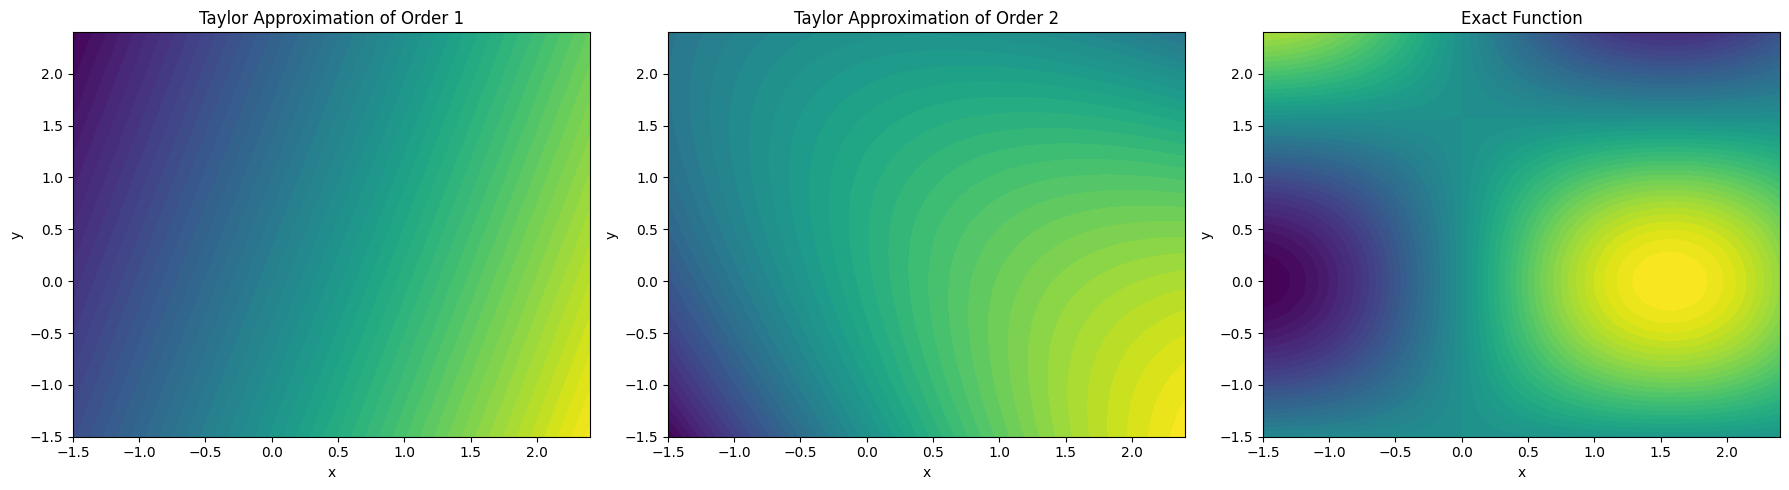

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def higher_order_approximation(g, dg, d2g, x0, mesh_size, order):
    """
    Compute the Taylor expansion of a function up to a specified order.

    Parameters:
    - g: function, the function g(x) to approximate
    - dg: gradient of g at x0
    - d2g: Hessian (second derivative matrix) of g at x0
    - x0: expansion point
    - mesh_size: the mesh size (defines the delta)
    - order: order of the Taylor expansion
    """
    # Grid points
    x = np.arange(x0[0] - 2, x0[0] + 2, mesh_size)
    y = np.arange(x0[1] - 2, x0[1] + 2, mesh_size)
    X, Y = np.meshgrid(x, y)

    # Calculate the higher-order approximation
    Z0 = g(x0)
    # First order term (linear term)
    Z1 = dg(x0)[0] * (X - x0[0]) + dg(x0)[1] * (Y - x0[1]) if order >= 1 else 0
    # Second order term (quadratic term)
    Z2 = 0.5 * (
        d2g(x0)[0, 0] * (X - x0[0])**2 +
        2 * d2g(x0)[0, 1] * (X - x0[0]) * (Y - x0[1]) +
        d2g(x0)[1, 1] * (Y - x0[1])**2
    ) if order >= 2 else 0

    Z = Z0 + Z1 + Z2
    return X, Y, Z

def plot_approximations():
    # Example function and its derivatives at x0
    def g(x): return np.sin(x[0]) * np.cos(x[1])
    def dg(x): return [np.cos(x[0]) * np.cos(x[1]), -np.sin(x[0]) * np.sin(x[1])]
    def d2g(x): return np.array([[-np.sin(x[0]) * np.cos(x[1]), -np.cos(x[0]) * np.sin(x[1])],
                                  [-np.cos(x[0]) * np.sin(x[1]), -np.sin(x[0]) * np.cos(x[1])]])

    x0 = np.array([0.5, 0.5])  # Point of expansion
    mesh_size = 0.1

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    orders = [1, 2]  # First and second order for illustration

    for i, order in enumerate(orders):
        X, Y, Z = higher_order_approximation(g, dg, d2g, x0, mesh_size, order)
        ax = axs[i]
        ax.contourf(X, Y, Z, levels=50, cmap='viridis')
        ax.set_title(f'Taylor Approximation of Order {order}')
        ax.set_xlabel('x')
        ax.set_ylabel('y')

    # Exact function plot for comparison
    x = np.arange(x0[0] - 2, x0[0] + 2, mesh_size)
    y = np.arange(x0[1] - 2, x0[1] + 2, mesh_size)
    X, Y = np.meshgrid(x, y)
    Z = g([X, Y])
    axs[2].contourf(X, Y, Z, levels=50, cmap='viridis')
    axs[2].set_title('Exact Function')
    axs[2].set_xlabel('x')
    axs[2].set_ylabel('y')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_approximations()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1242: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1243: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1244: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/python3.10/dist-packages/numpy/lib/fun

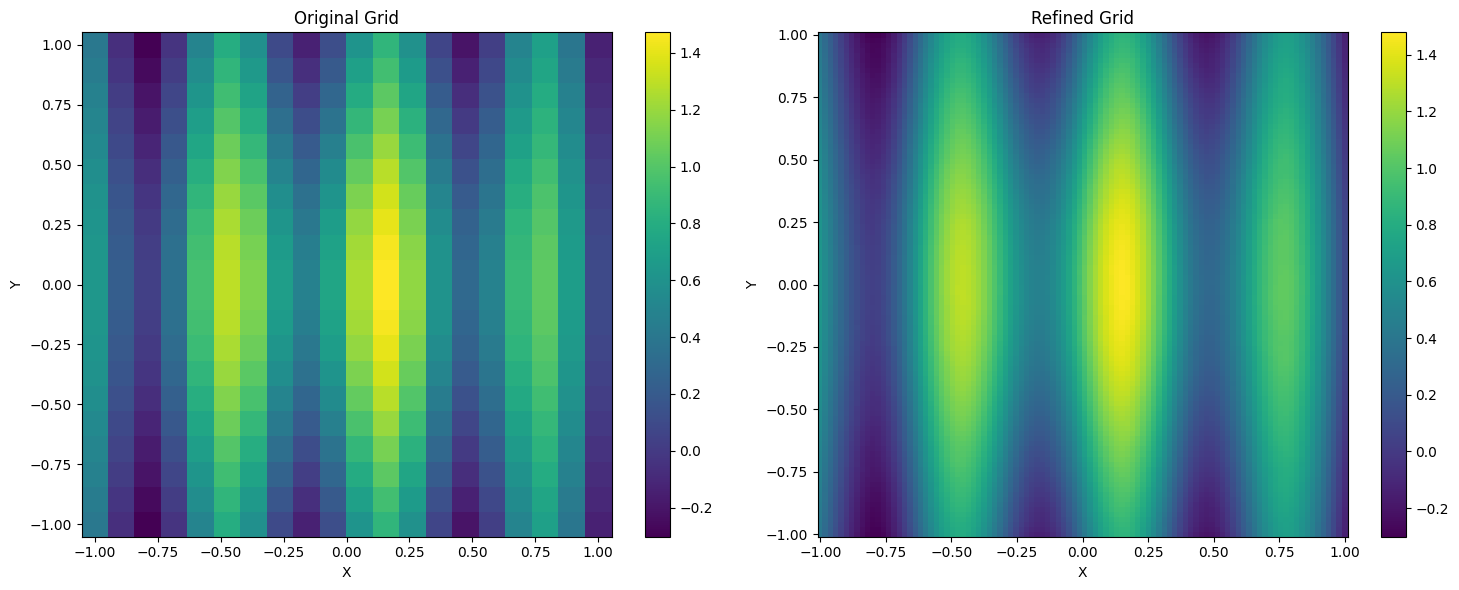

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Define a function with varying curvature, simulating a surface with singularities
def g(x, y):
    return np.exp(-(x**2 + y**2)) + 0.5 * np.sin(10 * x)

# Hessian computation for curvature analysis
def compute_hessian(X, Y, func):
    dx = np.gradient(func, X)
    dxx = np.gradient(dx, X)
    dxy = np.zeros(func.shape)  # Simplified for 2D case, as we can't compute dxy with flat arrays
    dy = np.gradient(func, Y)
    dyy = np.gradient(dy, Y)
    return dxx, dxy, dyy

def adaptive_refinement(X, Y, Z, threshold=0.1, max_iterations=5):
    # Flatten X and Y for computations
    X_flat = X.flatten()
    Y_flat = Y.flatten()
    Z_flat = Z.flatten()

    for _ in range(max_iterations):
        # Compute Hessian for curvature on flattened arrays
        points = np.column_stack((X_flat, Y_flat))
        dxx, dxy, dyy = compute_hessian(X_flat, Y_flat, Z_flat)

        # Eigenvalues of Hessian (simplified for 2D: det(H) / trace(H))
        k1 = 0.5 * (dxx + dyy + np.sqrt((dxx - dyy)**2 + 4 * dxy**2))
        k2 = 0.5 * (dxx + dyy - np.sqrt((dxx - dyy)**2 + 4 * dxy**2))

        # Curvature magnitude
        curvature = np.sqrt(k1**2 + k2**2)

        # Find points with high curvature for refinement
        refine_mask = curvature > threshold
        new_points = points[refine_mask]

        if len(new_points) == 0:
            break  # No more refinement needed

        # Add new points with some small perturbation for demonstration
        new_X = new_points[:, 0] + np.random.uniform(-0.01, 0.01, len(new_points))
        new_Y = new_points[:, 1] + np.random.uniform(-0.01, 0.01, len(new_points))

        # Update X, Y, and Z with the new points
        X_flat = np.hstack((X_flat, new_X))
        Y_flat = np.hstack((Y_flat, new_Y))
        Z_flat = np.hstack((Z_flat, g(new_X, new_Y)))

    return X_flat, Y_flat, Z_flat

# Initial grid
x = np.linspace(-1, 1, 20)
y = np.linspace(-1, 1, 20)
X, Y = np.meshgrid(x, y)
Z = g(X, Y)

# Perform adaptive refinement
X_ref, Y_ref, Z_ref = adaptive_refinement(X, Y, Z)

# Interpolate for smooth visualization
X_grid, Y_grid = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
Z_grid = griddata((X_ref, Y_ref), Z_ref, (X_grid, Y_grid), method='cubic')

plt.figure(figsize=(15, 6))

# Plot original grid
plt.subplot(121)
plt.pcolor(X, Y, Z, shading='auto')
plt.colorbar()
plt.title('Original Grid')
plt.xlabel('X')
plt.ylabel('Y')

# Plot refined grid
plt.subplot(122)
plt.pcolor(X_grid, Y_grid, Z_grid, shading='auto')
plt.colorbar()
plt.title('Refined Grid')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

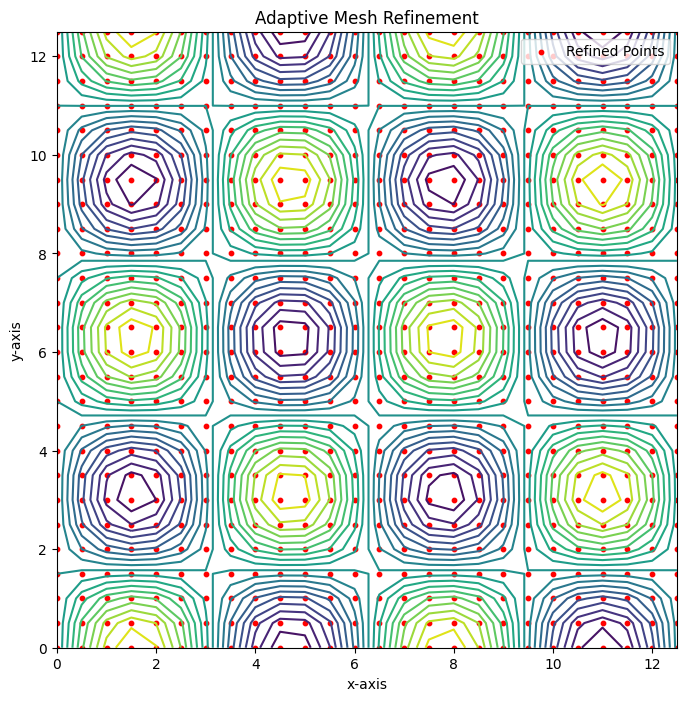

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

def compute_hessian(f, x, y):
    """Compute the Hessian matrix at a given point (x, y) for a function f."""
    g_xx = (f(x + 1e-5, y) - 2 * f(x, y) + f(x - 1e-5, y)) / 1e-5**2
    g_yy = (f(x, y + 1e-5) - 2 * f(x, y) + f(x, y - 1e-5)) / 1e-5**2
    g_xy = (f(x + 1e-5, y + 1e-5) - f(x + 1e-5, y - 1e-5)
            - f(x - 1e-5, y + 1e-5) + f(x - 1e-5, y - 1e-5)) / (4 * 1e-5**2)
    return np.array([[g_xx, g_xy], [g_xy, g_yy]])

def curvature_based_refinement(f, x_range, y_range, mesh_size, curvature_threshold):
    """Perform adaptive mesh refinement based on curvature."""
    xs, ys = np.meshgrid(np.arange(*x_range, mesh_size), np.arange(*y_range, mesh_size))
    refined_points = []

    for x, y in zip(xs.flatten(), ys.flatten()):
        hessian = compute_hessian(f, x, y)
        _, eigenvalues = eigh(hessian)
        curvature = np.max(np.abs(eigenvalues))

        # If curvature exceeds the threshold, refine the mesh locally
        if curvature > curvature_threshold:
            refined_points.append((x, y))

    return np.array(refined_points)

def f(x, y):
    """A test function to represent the hypersurface."""
    return np.sin(x) * np.cos(y)

def plot_adaptive_mesh(refined_points, x_range, y_range, mesh_size):
    """Plot the adaptive mesh and the original function."""
    fig, ax = plt.subplots(figsize=(8, 8))
    xs = np.arange(*x_range, mesh_size)
    ys = np.arange(*y_range, mesh_size)
    X, Y = np.meshgrid(xs, ys)
    Z = f(X, Y)

    ax.contour(X, Y, Z, levels=20, cmap='viridis')

    if len(refined_points) > 0:
        refined_x, refined_y = refined_points.T
        ax.scatter(refined_x, refined_y, color='red', s=10, label='Refined Points')

    ax.set_title("Adaptive Mesh Refinement")
    ax.set_xlabel("x-axis")
    ax.set_ylabel("y-axis")
    ax.legend()
    plt.show()

def main():
    x_range = (0, 4 * np.pi)
    y_range = (0, 4 * np.pi)
    initial_mesh_size = 0.5
    curvature_threshold = 0.1  # Example value for curvature threshold

    refined_points = curvature_based_refinement(f, x_range, y_range, initial_mesh_size, curvature_threshold)
    plot_adaptive_mesh(refined_points, x_range, y_range, initial_mesh_size)

if __name__ == "__main__":
    main()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1259: RuntimeWarning: invalid value encountered in scalar divide
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0


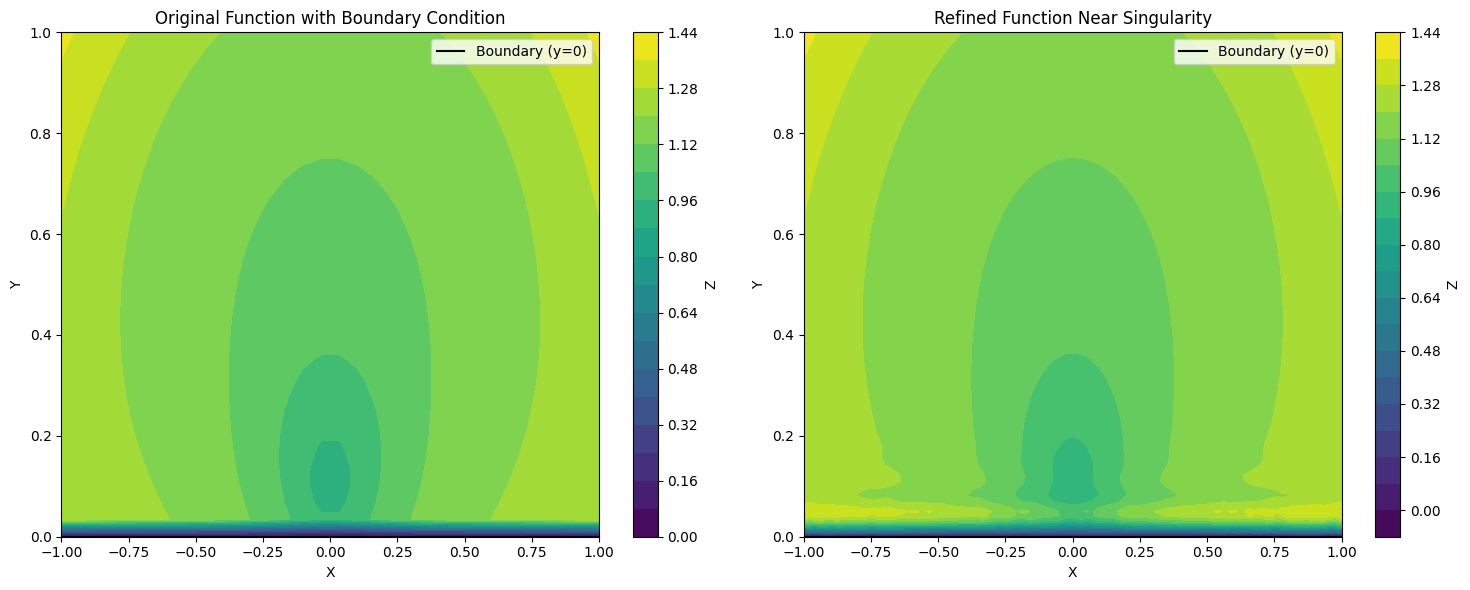

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Define a function with a singularity near the boundary
def g(x, y):
    # Example: Function with singularity near y=0 boundary
    return np.sqrt(x**2 + (y - 0.1)**2) - 0.1 + np.exp(-(x**2 + y**2))

# Boundary condition
def boundary(x):
    return 0  # Dirichlet boundary condition on y=0

# Helper function to enforce boundary conditions
def enforce_boundary(X, Y, Z):
    Z[Y == 0] = boundary(X[Y == 0])  # Apply boundary condition
    return Z

# Create a grid for initial points
x = np.linspace(-1, 1, 30)
y = np.linspace(0, 1, 30)  # Upper half plane with boundary at y=0
X, Y = np.meshgrid(x, y)
Z = g(X, Y)
Z = enforce_boundary(X, Y, Z)  # Enforce boundary condition

# Function to simulate sweeping net refinement
def refine_near_singularity(X, Y, Z, n_refinements=2):
    X_flat, Y_flat, Z_flat = X.flatten(), Y.flatten(), Z.flatten()

    for _ in range(n_refinements):
        # Compute gradients to identify regions of high change (near singularity)
        gx = np.gradient(Z_flat, X_flat)
        gy = np.gradient(Z_flat, Y_flat)
        gradient_magnitude = np.sqrt(gx**2 + gy**2)

        # Identify points for refinement
        high_gradient = gradient_magnitude > np.percentile(gradient_magnitude, 90)
        new_points = np.column_stack((X_flat[high_gradient], Y_flat[high_gradient]))

        # Add new points near the identified points
        # Generate new points with same number as high gradient points
        num_new_points = len(new_points)
        new_X = np.random.uniform(-1, 1, num_new_points)
        new_Y = np.random.uniform(0, 1, num_new_points)  # Ensure within boundary

        # Calculate function values for new points
        new_Z = g(new_X, new_Y)
        new_Z[new_Y == 0] = boundary(new_X[new_Y == 0])

        # Combine old and new points
        X_flat = np.hstack((X_flat, new_X))
        Y_flat = np.hstack((Y_flat, new_Y))
        Z_flat = np.hstack((Z_flat, new_Z))

    return X_flat, Y_flat, Z_flat

# Refine the mesh
X_ref, Y_ref, Z_ref = refine_near_singularity(X, Y, Z)

# Interpolate for smooth visualization
X_grid, Y_grid = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(0, 1, 100))
Z_grid = griddata((X_ref, Y_ref), Z_ref, (X_grid, Y_grid), method='cubic')

# Plotting
plt.figure(figsize=(15, 6))

# Plot original function with boundary condition
plt.subplot(121)
plt.contourf(X, Y, Z, cmap='viridis', levels=20)
plt.colorbar(label='Z')
plt.title('Original Function with Boundary Condition')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, np.zeros_like(x), 'k-', label='Boundary (y=0)')  # Plot boundary
plt.legend()

# Plot refined function
plt.subplot(122)
plt.contourf(X_grid, Y_grid, Z_grid, cmap='viridis', levels=20)
plt.colorbar(label='Z')
plt.title('Refined Function Near Singularity')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, np.zeros_like(x), 'k-', label='Boundary (y=0)')  # Plot boundary
plt.legend()

plt.tight_layout()
plt.show()

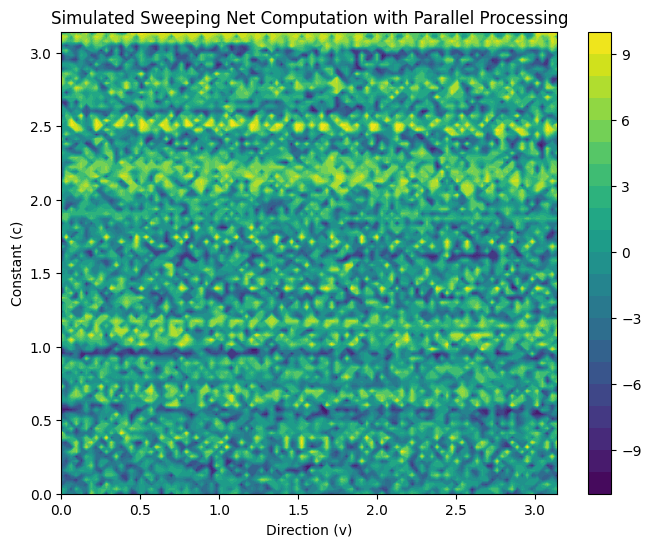

In [12]:
import numpy as np
import concurrent.futures
import matplotlib.pyplot as plt

# Define a simple function to simulate computation for a sweeping net point
def compute_sweeping_net_point(v, c):
    """
    Simulates computational tasks for a direction v and constant c.
    For the sake of demonstration, we'll just perform a calculation
    that depends on v and c.
    """
    # Simulate a calculation (for example, evaluate a simple function)
    # Replace this with the real function's computations
    result = np.sin(v) * np.cos(c) + v**2 - c**2
    return v, c, result

def construct_sweeping_net_concurrently(v_values, c_values):
    """
    Construct sweeping net using parallel computation over different
    directions and constants, demonstrating decomposable parallel tasks.
    """
    results = []
    # Use ThreadPoolExecutor or ProcessPoolExecutor for parallel execution
    with concurrent.futures.ThreadPoolExecutor() as executor:
        # Prepare tasks for each combination of v and c
        futures = [executor.submit(compute_sweeping_net_point, v, c)
                   for v in v_values for c in c_values]

        # Collect results as they complete
        for future in concurrent.futures.as_completed(futures):
            results.append(future.result())

    return np.array(results)

def plot_results(results):
    """
    Plot computed results from the sweeping net points.
    """
    # Transform results to a grid format for plotting
    v_values = np.unique(results[:, 0])
    c_values = np.unique(results[:, 1])
    Z = results[:, 2].reshape(len(v_values), len(c_values))

    plt.figure(figsize=(8, 6))
    plt.contourf(v_values, c_values, Z, levels=20, cmap='viridis')
    plt.colorbar()
    plt.xlabel('Direction (v)')
    plt.ylabel('Constant (c)')
    plt.title('Simulated Sweeping Net Computation with Parallel Processing')
    plt.show()

def main():
    # Setup a range of v and c values to simulate computation
    v_values = np.linspace(0, np.pi, 100)  # Range of directions
    c_values = np.linspace(0, np.pi, 100)  # Range of constant values

    # Perform the parallel computation
    results = construct_sweeping_net_concurrently(v_values, c_values)

    # Plot the results
    plot_results(results)

if __name__ == "__main__":
    main()

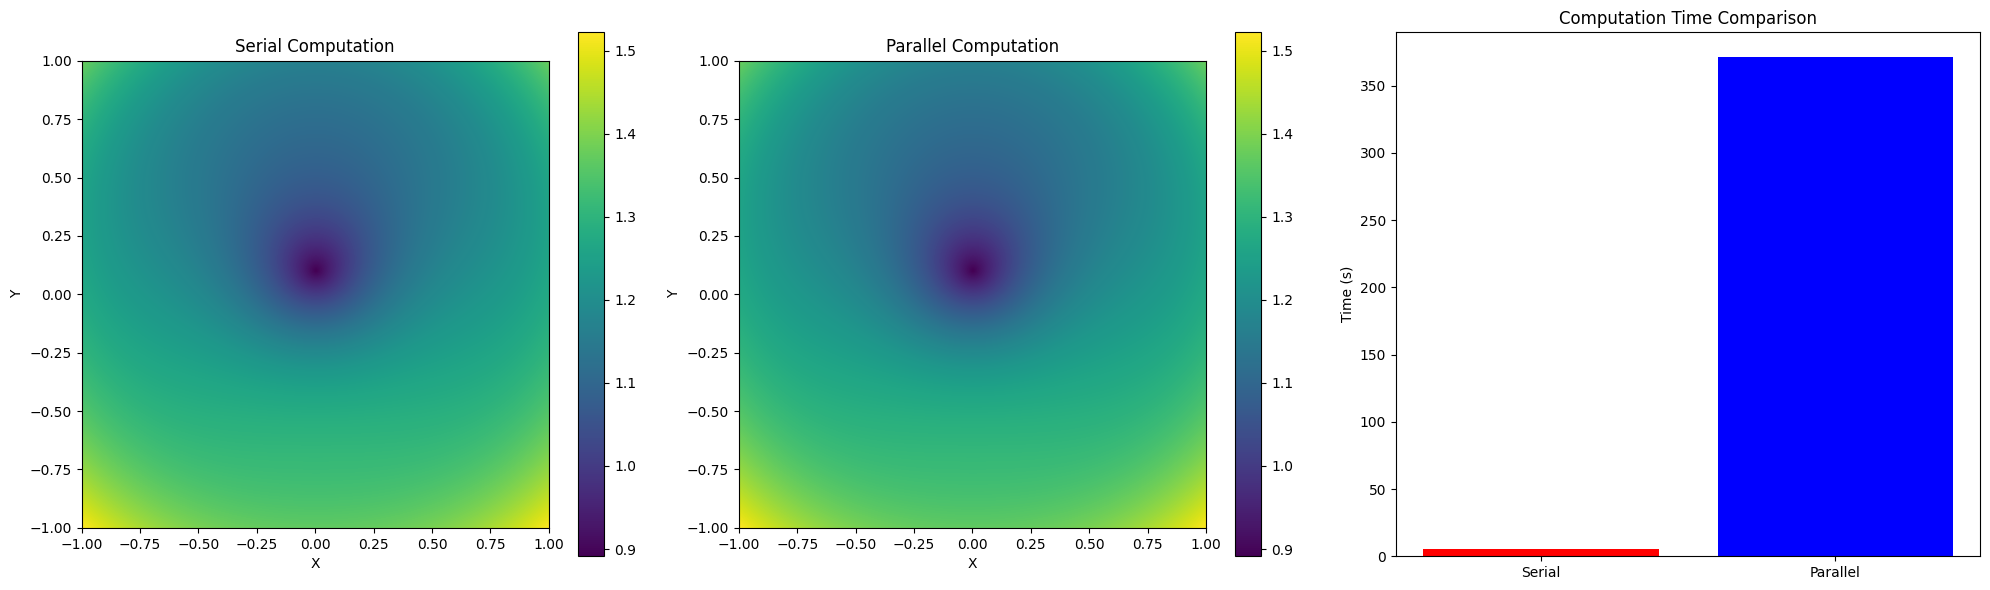

Serial computation time: 5.22551417350769 seconds
Parallel computation time: 371.15895557403564 seconds
Speedup: 0.01x


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time
from multiprocessing import Pool
import concurrent.futures

# Define a function with a singularity
def g(x, y):
    return np.sqrt(x**2 + (y - 0.1)**2) - 0.1 + np.exp(-(x**2 + y**2))

# Function to evaluate g at a single point, simulating expensive computation
def eval_g(point):
    x, y = point
    return g(x, y)

# Serial computation
def serial_evaluation(points):
    return [eval_g(point) for point in points]

# Parallel computation
def parallel_evaluation(points, num_processes=4):
    with Pool(processes=num_processes) as pool:
        results = pool.map(eval_g, points)
    return results

# Setup for comparison
x = np.linspace(-1, 1, 1000)
y = np.linspace(-1, 1, 1000)
X, Y = np.meshgrid(x, y)
points = list(zip(X.flatten(), Y.flatten()))

# Run serial and parallel computations
start_time = time.time()
serial_results = serial_evaluation(points)
serial_time = time.time() - start_time

start_time = time.time()
with concurrent.futures.ProcessPoolExecutor(max_workers=4) as executor:
    parallel_results = list(executor.map(eval_g, points))
parallel_time = time.time() - start_time

# Convert results back to 2D arrays for visualization
Z_serial = np.array(serial_results).reshape(X.shape)
Z_parallel = np.array(parallel_results).reshape(X.shape)

# Visualization
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Plot serial computation
img_serial = ax1.imshow(Z_serial, extent=[-1, 1, -1, 1], origin='lower', cmap='viridis')
plt.colorbar(img_serial, ax=ax1)
ax1.set_title('Serial Computation')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

# Plot parallel computation
img_parallel = ax2.imshow(Z_parallel, extent=[-1, 1, -1, 1], origin='lower', cmap='viridis')
plt.colorbar(img_parallel, ax=ax2)
ax2.set_title('Parallel Computation')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

# Performance comparison
ax3.bar(['Serial', 'Parallel'], [serial_time, parallel_time], color=['red', 'blue'])
ax3.set_ylabel('Time (s)')
ax3.set_title('Computation Time Comparison')

plt.tight_layout()
plt.show()

print(f"Serial computation time: {serial_time} seconds")
print(f"Parallel computation time: {parallel_time} seconds")
print(f"Speedup: {serial_time / parallel_time:.2f}x")

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1238: RuntimeWarning: divide by zero encountered in divide
  out[tuple(slice1)] = (f[tuple(slice4)] - f[tuple(slice2)]) / (2. * ax_dx)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1259: RuntimeWarning: divide by zero encountered in divide
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1266: RuntimeWarning: divide by zero encountered in divide
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_n
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1238: RuntimeWarning: invalid value encountered in subtract
  out[tuple(slice1)] = (f[tuple(slice4)] - f[tuple(slice2)]) / (2. * ax_dx)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1259: RuntimeWarning: invalid value encountered in subtract
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0
/usr/local/l

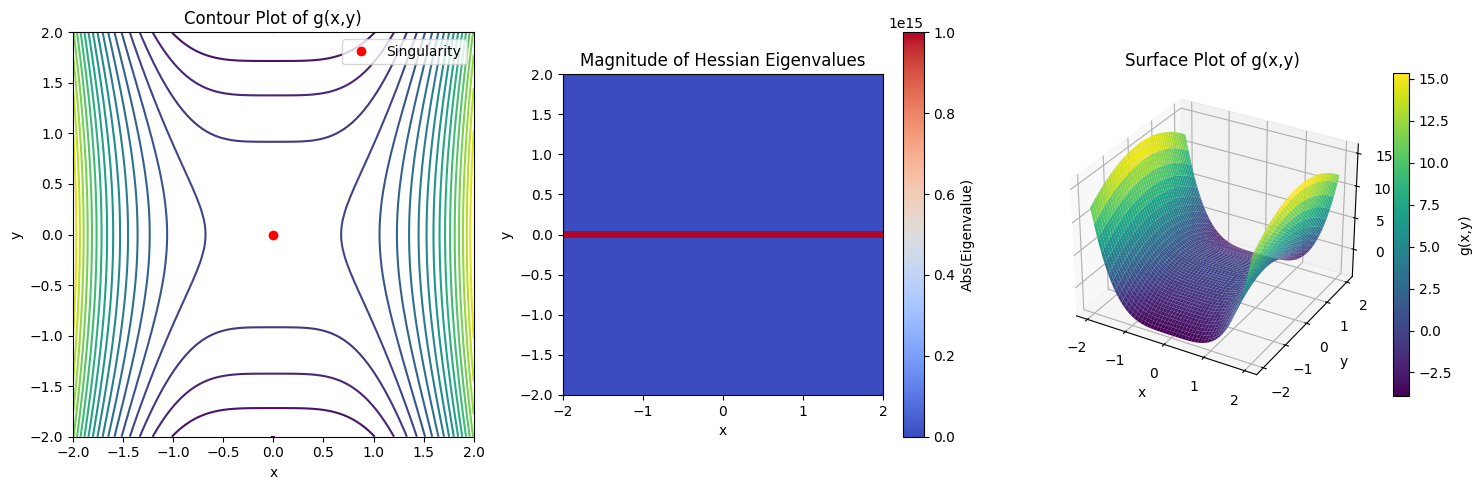

Hessian at (0,0): [[-1.e+15  0.e+00]
 [ 0.e+00  1.e+15]]
Eigenvalues of Hessian at (0,0): [-1.e+15  1.e+15]


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example function with a degenerate Hessian at (0,0)
def g(x, y):
    # Here, the second derivative in one direction vanishes near (0,0)
    return x**4 - y**2

# Hessian analysis function
def compute_hessian(x, y, func):
    # First partial derivatives
    dx = x[1, 0] - x[0, 0]  # Assuming x and y are meshgrids
    dy = y[0, 1] - y[0, 0]
    fx, fy = np.gradient(func(x, y), dx, dy)

    # Second partial derivatives
    fxx, fxy = np.gradient(fx, dx, dy)
    fyx, fyy = np.gradient(fy, dx, dy)

    # Create a 3D array for the Hessian at each point
    hessian = np.empty((fxx.shape[0], fxx.shape[1], 2, 2))
    hessian[:, :, 0, 0] = fxx
    hessian[:, :, 0, 1] = fxy
    hessian[:, :, 1, 0] = fyx
    hessian[:, :, 1, 1] = fyy

    # Handle overflow by clipping extreme values
    hessian = np.clip(hessian, -1e15, 1e15)
    hessian = np.nan_to_num(hessian, nan=0.0, posinf=1e15, neginf=-1e15)

    return hessian

# Function to visualize level sets and Hessian eigenvalues
def visualize_degenerate_hessian():
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)
    Z = g(X, Y)

    # Compute Hessian for all points
    hessian = compute_hessian(X, Y, g)

    # Compute Hessian at center, ensuring no NaNs or infs
    hessian_center = hessian[50, 50]  # Assuming singularity is at (0,0) grid center
    eigenvalues = np.linalg.eigvals(hessian_center)

    plt.figure(figsize=(15, 5))

    # 2D contour plot
    plt.subplot(131)
    levels = np.linspace(np.min(Z), np.max(Z), 20)
    plt.contour(X, Y, Z, levels=levels, cmap='viridis')
    plt.title('Contour Plot of g(x,y)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(0, 0, 'ro', label='Singularity')  # Mark the singularity
    plt.legend()

    # Hessian eigenvalues visualization
    plt.subplot(132)
    eigenvalues_grid = np.linalg.eigvals(hessian.reshape(-1, 2, 2)).reshape(*hessian.shape[:2], 2)
    eigenvalues_grid = np.clip(eigenvalues_grid, -1e15, 1e15)  # Clip extreme values
    plt.imshow(np.abs(eigenvalues_grid[:, :, 0]), extent=[-2, 2, -2, 2], cmap='coolwarm', origin='lower')
    plt.colorbar(label='Abs(Eigenvalue)')
    plt.title('Magnitude of Hessian Eigenvalues')
    plt.xlabel('x')
    plt.ylabel('y')

    # Surface plot
    ax = plt.subplot(133, projection='3d')  # Use projection='3d' for 3D plots
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_title('Surface Plot of g(x,y)')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.colorbar(surf, label='g(x,y)', ax=ax, shrink=0.8)

    plt.tight_layout()
    plt.show()

    print(f"Hessian at (0,0): {hessian_center}")
    print(f"Eigenvalues of Hessian at (0,0): {eigenvalues}")

# Run the visualization
visualize_degenerate_hessian()

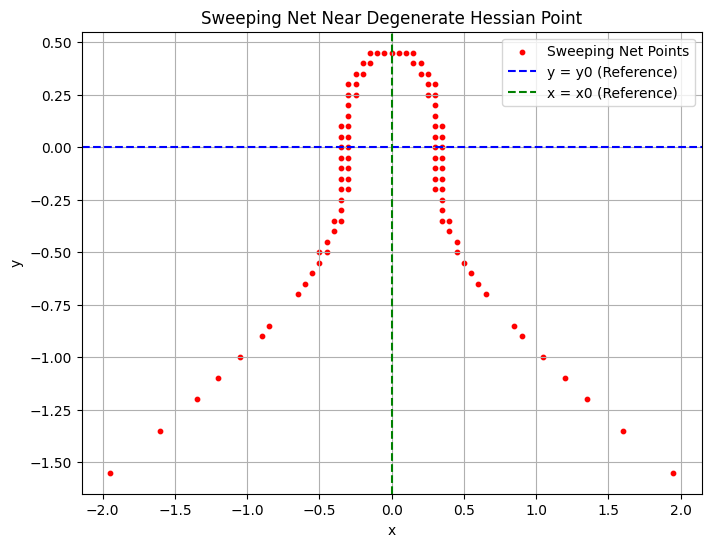

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def g(x, y):
    """A function with degenerate Hessian at the origin."""
    return x**2 + y**3  # Degenerate in x direction in terms of second derivatives

def hessian_g(x, y):
    """Calculate the Hessian matrix of the function g at (x, y)."""
    return np.array([[2, 0],
                     [0, 6 * y]])

def construct_sweeping_net(x0, y0, level_set=0.1, grid_size=0.05):
    """Construct sweeping net considering higher-order terms."""
    x_range = np.arange(x0 - 2, x0 + 2, grid_size)
    y_range = np.arange(y0 - 2, y0 + 2, grid_size)
    X, Y = np.meshgrid(x_range, y_range)

    T = X**2 + Y**3  # Taylor expansion including higher-order terms
    Z = g(X, Y)

    # Extract points near the level set
    indices = np.abs(T - level_set) < grid_size * 0.5
    net_points_x = X[indices]
    net_points_y = Y[indices]
    return net_points_x, net_points_y

def plot_sweeping_net(net_points_x, net_points_y, x0, y0):
    """Plot the sweeping net with approximation points near the level set."""
    plt.figure(figsize=(8, 6))
    plt.scatter(net_points_x, net_points_y, s=10, c='r', label='Sweeping Net Points')
    plt.axhline(y=y0, color='b', linestyle='--', label='y = y0 (Reference)')
    plt.axvline(x=x0, color='g', linestyle='--', label='x = x0 (Reference)')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Sweeping Net Near Degenerate Hessian Point')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    x0, y0 = 0, 0  # Point of singularity
    level_set = 0.1  # Level set to approximate
    grid_size = 0.05  # Mesh grid size

    net_points_x, net_points_y = construct_sweeping_net(x0, y0, level_set, grid_size)
    plot_sweeping_net(net_points_x, net_points_y, x0, y0)

if __name__ == "__main__":
    main()

<ipython-input-16-238ac6c9be3d>:52: UserWarning: The following kwargs were not used by contour: 'label'
  intersection = ax3.contour(X, Y, Z1, levels=[0], colors='g', linewidths=2, zdir='z', label='Intersection')


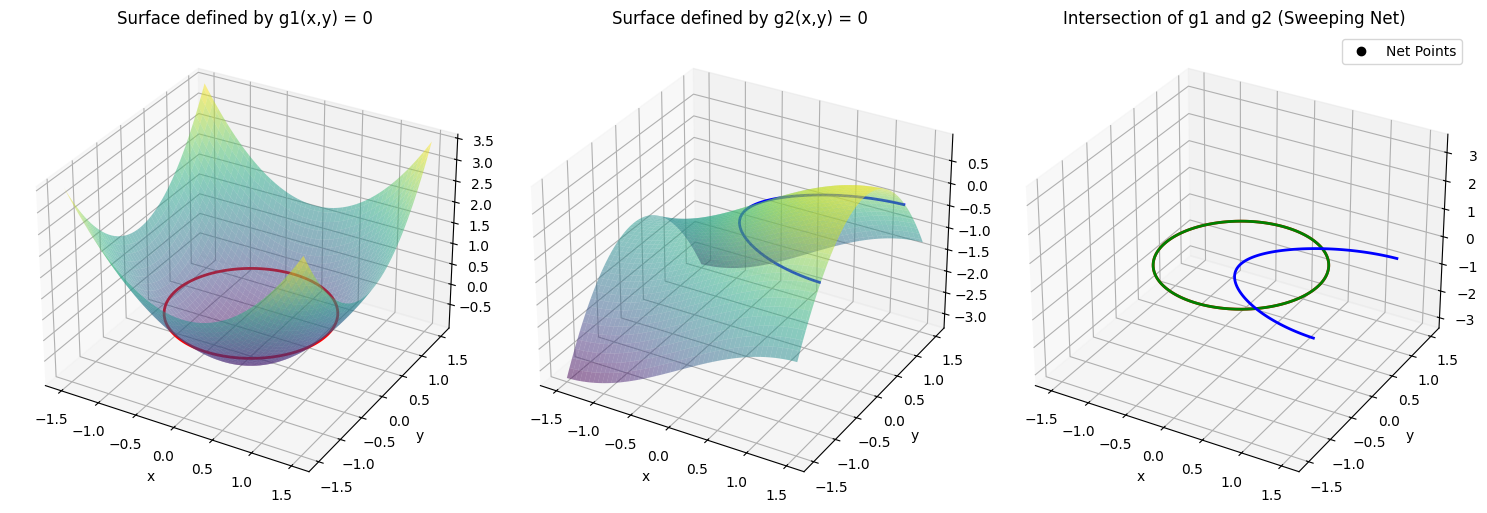

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def g1(x, y):
    # First defining function for the curve (2D in 3D space)
    return x**2 + y**2 - 1  # Circle equation

def g2(x, y):
    # Second defining function, making the intersection a curve
    return np.sin(x) - y**2  # This creates an interesting intersection with g1

def compute_hessian(func, x, y):
    dx = 0.1  # Assuming uniform grid spacing for simplicity
    fx, fy = np.gradient(func(x, y), dx, dx)
    return np.array([[np.gradient(fx, dx, dx)[0], np.gradient(fx, dx, dx)[1]],
                     [np.gradient(fy, dx, dx)[0], np.gradient(fy, dx, dx)[1]]])

# Create a grid
x = np.linspace(-1.5, 1.5, 100)
y = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x, y)

# Compute the functions
Z1 = g1(X, Y)
Z2 = g2(X, Y)

fig = plt.figure(figsize=(15, 5))

# Plot level set of g1
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, Z1, cmap='viridis', edgecolor='none', alpha=0.5)
ax1.contour(X, Y, Z1, levels=[0], colors='r', linewidths=2, zdir='z')  # Curve where Z1=0
ax1.set_title('Surface defined by g1(x,y) = 0')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

# Plot level set of g2
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X, Y, Z2, cmap='viridis', edgecolor='none', alpha=0.5)
ax2.contour(X, Y, Z2, levels=[0], colors='b', linewidths=2, zdir='z')  # Curve where Z2=0
ax2.set_title('Surface defined by g2(x,y) = 0')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')

# Plot the intersection (sweeping net approximation)
ax3 = fig.add_subplot(133, projection='3d')
ax3.contour(X, Y, Z1, levels=[0], colors='r', linewidths=2, zdir='z')
ax3.contour(X, Y, Z2, levels=[0], colors='b', linewidths=2, zdir='z')
intersection = ax3.contour(X, Y, Z1, levels=[0], colors='g', linewidths=2, zdir='z', label='Intersection')

# Find points where both g1 and g2 are close to zero
mask = (np.abs(Z1) < 0.01) & (np.abs(Z2) < 0.01)
x_points, y_points = X[mask], Y[mask]
ax3.plot(x_points, y_points, [g1(xi, yi) for xi, yi in zip(x_points, y_points)], 'ko', label='Net Points')
ax3.set_title('Intersection of g1 and g2 (Sweeping Net)')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')
ax3.legend()

plt.tight_layout()
plt.show()

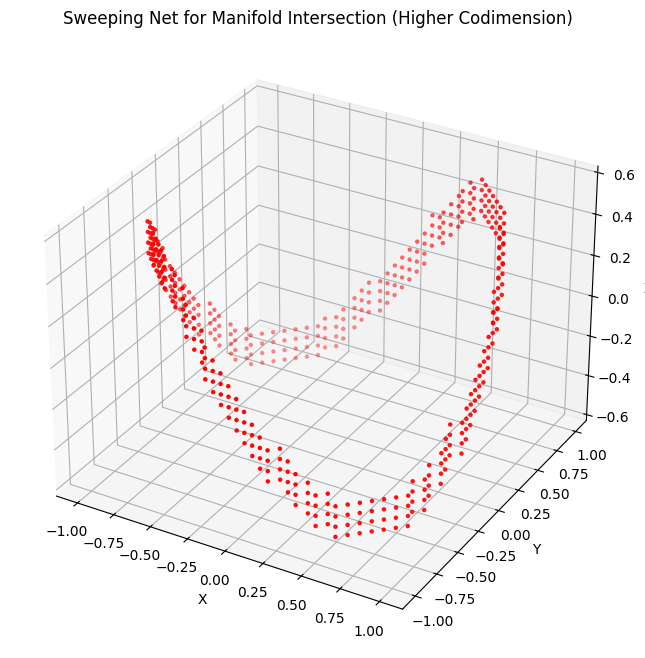

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define functions to describe the manifold
def g1(x, y, z):
    """First constraint function."""
    return x**2 + y**2 - 1  # Represents a cylinder

def g2(x, y, z):
    """Second constraint function."""
    return z - x * y  # Represents a hyperbolic paraboloid

def approximate_curve(x_range, y_range, z_range, grid_size=0.1):
    """Construct a sweeping net by evaluating where g1 and g2 approximate zero."""
    x = np.arange(*x_range, grid_size)
    y = np.arange(*y_range, grid_size)
    z = np.arange(*z_range, grid_size)
    X, Y, Z = np.meshgrid(x, y, z)

    F1 = g1(X, Y, Z)
    F2 = g2(X, Y, Z)

    # Find where both constraint functions are close to zero
    intersection = np.logical_and(np.abs(F1) < grid_size, np.abs(F2) < grid_size*2)
    curve_x = X[intersection]
    curve_y = Y[intersection]
    curve_z = Z[intersection]

    return curve_x, curve_y, curve_z

def plot_sweeping_net(curve_x, curve_y, curve_z):
    """Plot 3D curve representing the intersection determined by g1 and g2."""
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(curve_x, curve_y, curve_z, color='r', s=5)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Sweeping Net for Manifold Intersection (Higher Codimension)')

    plt.show()

def main():
    x_range = (-1.5, 1.5)
    y_range = (-1.5, 1.5)
    z_range = (-2, 2)
    grid_size = 0.05

    curve_x, curve_y, curve_z = approximate_curve(x_range, y_range, z_range, grid_size)
    plot_sweeping_net(curve_x, curve_y, curve_z)

if __name__ == "__main__":
    main()

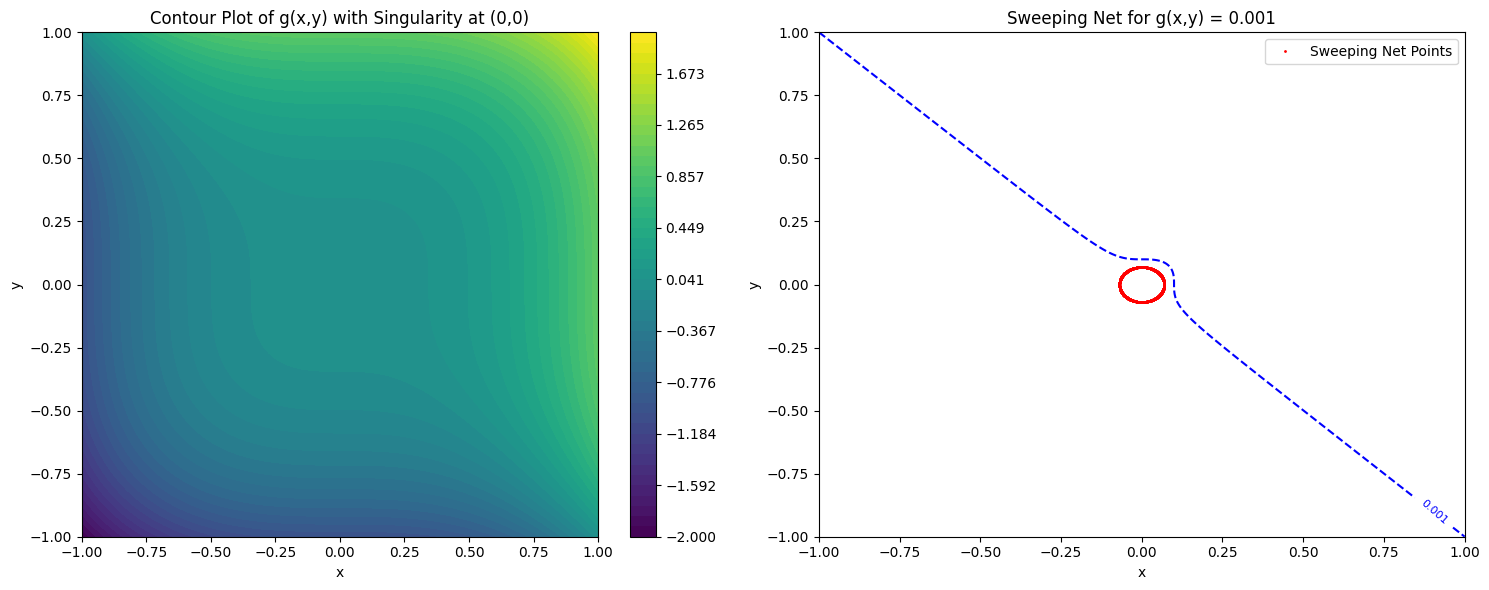

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def g(x, y, m=3):
    """
    Function with a singularity of multiplicity m at the origin.
    """
    return (x**m + y**m)

# Generate grid
x = np.linspace(-1, 1, 400)
y = np.linspace(-1, 1, 400)
X, Y = np.meshgrid(x, y)
Z = g(X, Y)

# Sweeping Net Approximation
def sweeping_net(m, c):
    """
    Compute points for the sweeping net approximation for a given m and c.

    :param m: Multiplicity of the singularity
    :param c: Small constant for the level set
    :return: Array of points for the sweeping net
    """
    # Generate directions on the unit sphere
    angles = np.linspace(0, 2*np.pi, 1000)
    directions = np.column_stack((np.cos(angles), np.sin(angles)))  # Unit vectors in 2D

    # Compute r for each direction based on the m-th order term
    radii = (c / (m * (directions[:, 0]**(m-1) + directions[:, 1]**(m-1))))**(1/m)

    # Calculate points
    points = radii[:, np.newaxis] * directions
    return points

# Set c close to zero
c = 0.001

# Compute sweeping net points
net_points = sweeping_net(m=3, c=c)

# Plotting
plt.figure(figsize=(15, 6))

# First subplot: Original Function
plt.subplot(121)
levels = np.linspace(Z.min(), Z.max(), 50)
contour = plt.contourf(X, Y, Z, levels=levels, cmap='viridis')
plt.colorbar(contour)
plt.title('Contour Plot of g(x,y) with Singularity at (0,0)')
plt.xlabel('x')
plt.ylabel('y')

# Second subplot: Sweeping Net Approximation
plt.subplot(122)
# Plot the sweeping net points
plt.plot(net_points[:, 0], net_points[:, 1], 'r.', markersize=2, label='Sweeping Net Points')
# Overlay the contour for the specific level set
contour = plt.contour(X, Y, Z, levels=[c], colors='blue', linestyles='dashed')
plt.clabel(contour, inline=True, fontsize=8)
plt.title(f'Sweeping Net for g(x,y) = {c}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay
from scipy import optimize

# Define a simple minimal surface with a simulated singularity at (0,0)
def minimal_surface(x, y):
    r = np.sqrt(x**2 + y**2)
    # Use np.where for element-wise conditional operation
    return np.where(r > 0, r * np.sin(1/r), 0)

# Sweeping Net Approximation for Minimal Surfaces
def sweeping_net_minimal(g_func, c, num_points=1000):
    points = []
    for _ in range(num_points):
        # Random direction on sphere (unit vector)
        theta = np.random.uniform(0, 2*np.pi)
        direction = np.array([np.cos(theta), np.sin(theta), 0])

        # Solve for r where the function equals c
        try:
            def func_to_solve(r):
                return g_func(r * direction[0], r * direction[1]) - c
            r = optimize.brentq(func_to_solve, 0, 1)  # Assuming c is small enough that r is within 1
            point = r * direction
            point[2] = g_func(point[0], point[1])  # Set z coordinate to the function value
            points.append(point)
        except (ValueError, ZeroDivisionError):
            continue  # Skip if we can't find a solution or if division by zero occurs
    return np.array(points)

# Set up the grid
x = np.linspace(-1, 1, 200)
y = np.linspace(-1, 1, 200)
X, Y = np.meshgrid(x, y)
Z = minimal_surface(X, Y)

# Small constant for level set
c = 0.01

# Compute sweeping net points
net_points = sweeping_net_minimal(minimal_surface, c)

# Triangulate points for surface approximation
tri = Delaunay(net_points[:, :2])

# Plotting
fig = plt.figure(figsize=(15, 10))

# Original minimal surface
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)
ax1.set_title('Minimal Surface with Singularity')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

# Sweeping Net Approximation
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_trisurf(net_points[:, 0], net_points[:, 1], net_points[:, 2], triangles=tri.simplices, cmap='viridis', edgecolor='none', alpha=0.8)
ax2.set_title('Sweeping Net Approximation')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')

# Add a contour plot of the original surface for comparison
contour = plt.contour(X, Y, Z, levels=[c], colors='r', alpha=0.5, linestyles='--')
for line in contour.collections[0].get_paths():
    points = line.vertices
    # Here we assume Z is single-valued for the contour. If not, adjust accordingly.
    ax2.plot(points[:, 0], points[:, 1], Z[int(contour.collections[0].get_array()[0])], 'r--', alpha=0.5)

plt.tight_layout()
plt.show()

<ipython-input-19-a395e204f888>:11: RuntimeWarning: divide by zero encountered in scalar divide
  return np.where(r > 0, r * np.sin(1/r), 0)
<ipython-input-19-a395e204f888>:11: RuntimeWarning: invalid value encountered in sin
  return np.where(r > 0, r * np.sin(1/r), 0)
<ipython-input-19-a395e204f888>:69: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for line in contour.collections[0].get_paths():
<ipython-input-19-a395e204f888>:72: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  ax2.plot(points[:, 0], points[:, 1], Z[int(contour.collections[0].get_array()[0])], 'r--', alpha=0.5)


TypeError: 'NoneType' object is not subscriptable

Error in callback <function _draw_all_if_interactive at 0x7c2266e4e4d0> (for post_execute):


AttributeError: 'PathCollection' object has no attribute 'do_3d_projection'

AttributeError: 'PathCollection' object has no attribute 'do_3d_projection'

<Figure size 1500x1000 with 2 Axes>

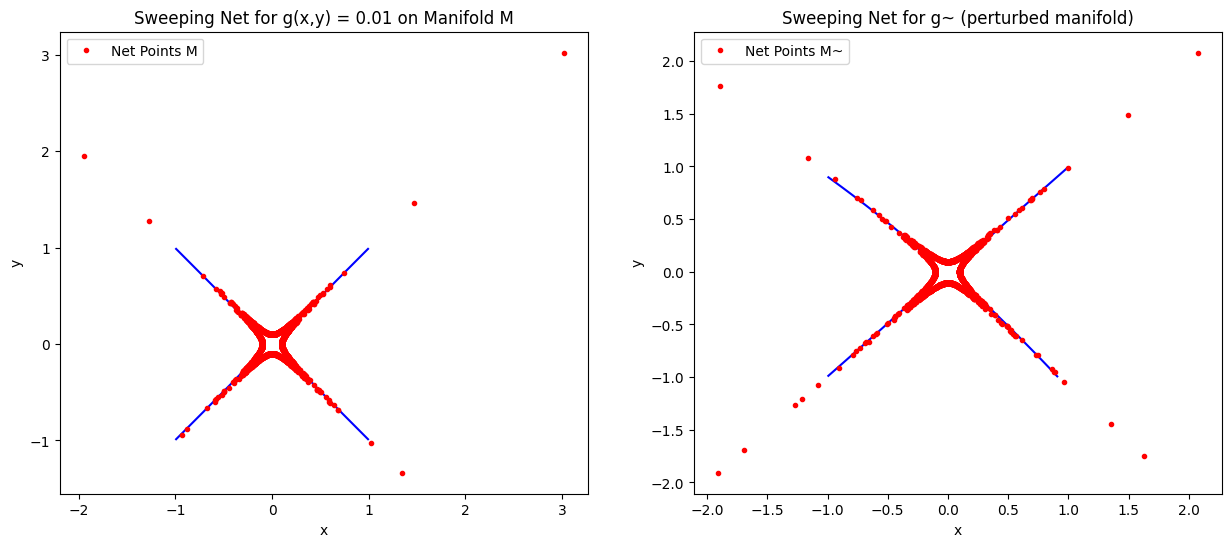

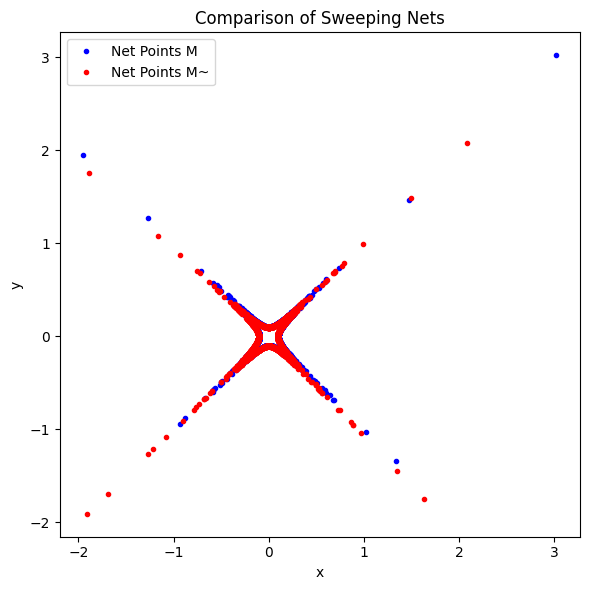

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define function for manifold M
def g(x, y):
    return x**2 - y**2

# Define function for manifold M with perturbation (tilde M)
def g_perturbed(x, y, epsilon=0.1):
    return g(x, y) + epsilon * (x**3 - y**3)

# Generate grid
x = np.linspace(-1, 1, 400)
y = np.linspace(-1, 1, 400)
X, Y = np.meshgrid(x, y)

# Compute Z values for both functions
Z = g(X, Y)
Z_perturbed = g_perturbed(X, Y)

# Sweeping Net Approximation
def sweeping_net(g_func, c, num_points=2000):
    points = []
    for _ in range(num_points):
        # Random direction in [-1, 1] for both x and y
        direction = np.random.uniform(-1, 1, 2)
        direction /= np.linalg.norm(direction)  # Normalize to unit vector

        # Solve for r where g(r*v) = c
        try:
            r = np.sqrt(c / np.abs(g_func(direction[0], direction[1])))
            point = r * direction
            points.append(point)
        except ZeroDivisionError:
            continue  # Skip if division by zero occurs due to singularity
    return np.array(points)

# Small constant for level set
c = 0.01

# Compute sweeping net points for both manifolds
net_points = sweeping_net(g, c)
net_points_perturbed = sweeping_net(g_perturbed, c)

# Plotting
plt.figure(figsize=(15, 6))

# First subplot: Original Manifold M
plt.subplot(121)
contour = plt.contour(X, Y, Z, levels=[c], colors='blue')
plt.plot(net_points[:, 0], net_points[:, 1], 'r.', label='Net Points M')
plt.title(f'Sweeping Net for g(x,y) = {c} on Manifold M')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Second subplot: Perturbed Manifold M
plt.subplot(122)
contour = plt.contour(X, Y, Z_perturbed, levels=[c], colors='blue')
plt.plot(net_points_perturbed[:, 0], net_points_perturbed[:, 1], 'r.', label='Net Points M~')
plt.title(f'Sweeping Net for g~ (perturbed manifold)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Overlay both sets of net points for comparison
plt.figure(figsize=(6, 6))
plt.plot(net_points[:, 0], net_points[:, 1], 'b.', label='Net Points M')
plt.plot(net_points_perturbed[:, 0], net_points_perturbed[:, 1], 'r.', label='Net Points M~')
plt.title('Comparison of Sweeping Nets')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

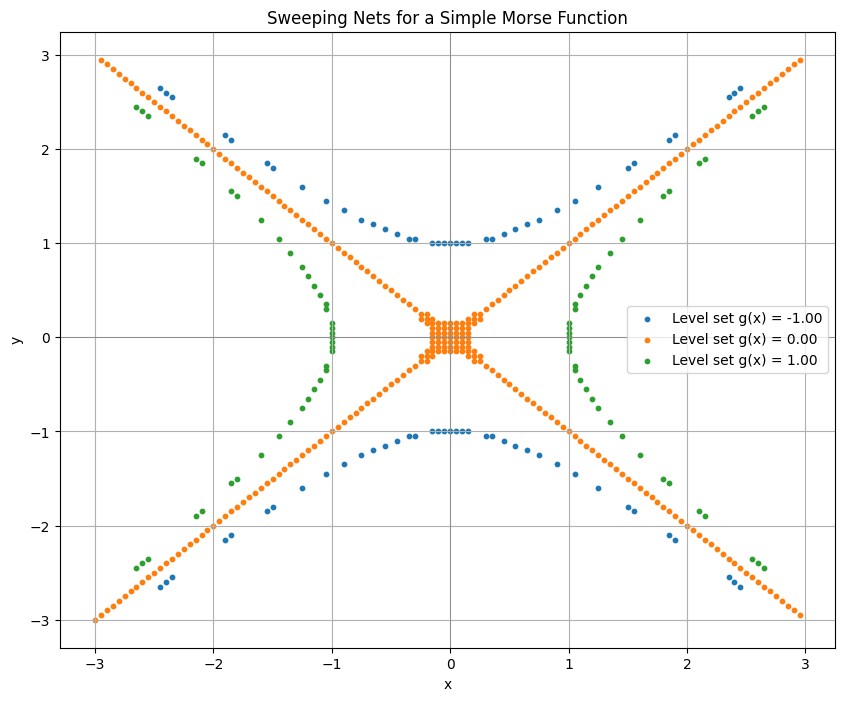

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def morse_function(x, y):
    """Define a simple Morse function with a critical point at (0, 0)."""
    return x**2 - y**2  # Saddle point with Morse index 1

def construct_sweeping_net(morse_func, c_values, grid_size=0.1):
    """Construct sweeping net for the Morse function at different level sets."""
    x_range = np.arange(-3, 3, grid_size)
    y_range = np.arange(-3, 3, grid_size)
    X, Y = np.meshgrid(x_range, y_range)

    sweeping_nets = []

    for c in c_values:
        Z = morse_func(X, Y)
        # Find the contours (level sets) where function equals c
        net_points_mask = np.abs(Z - c) < grid_size * 0.5
        net_points_x = X[net_points_mask]
        net_points_y = Y[net_points_mask]
        sweeping_nets.append((net_points_x, net_points_y, c))

    return sweeping_nets

def plot_sweeping_net(sweeping_nets):
    """Plot sweeping nets for different level sets."""
    plt.figure(figsize=(10, 8))

    for net_points_x, net_points_y, c in sweeping_nets:
        plt.scatter(net_points_x, net_points_y, label=f'Level set g(x) = {c:.2f}', s=10)

    plt.axhline(y=0, color='grey', lw=0.5)
    plt.axvline(x=0, color='grey', lw=0.5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Sweeping Nets for a Simple Morse Function')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    # Different level set values to visualize
    c_values = [-1.0, 0.0, 1.0]
    grid_size = 0.05

    # Construct and plot the sweeping net for the Morse function
    sweeping_nets = construct_sweeping_net(morse_function, c_values, grid_size)
    plot_sweeping_net(sweeping_nets)

if __name__ == "__main__":
    main()

<ipython-input-22-348b09a4ee3b>:19: RuntimeWarning: invalid value encountered in sqrt
  r = np.sqrt(c / np.abs(g(direction[0], direction[1])))


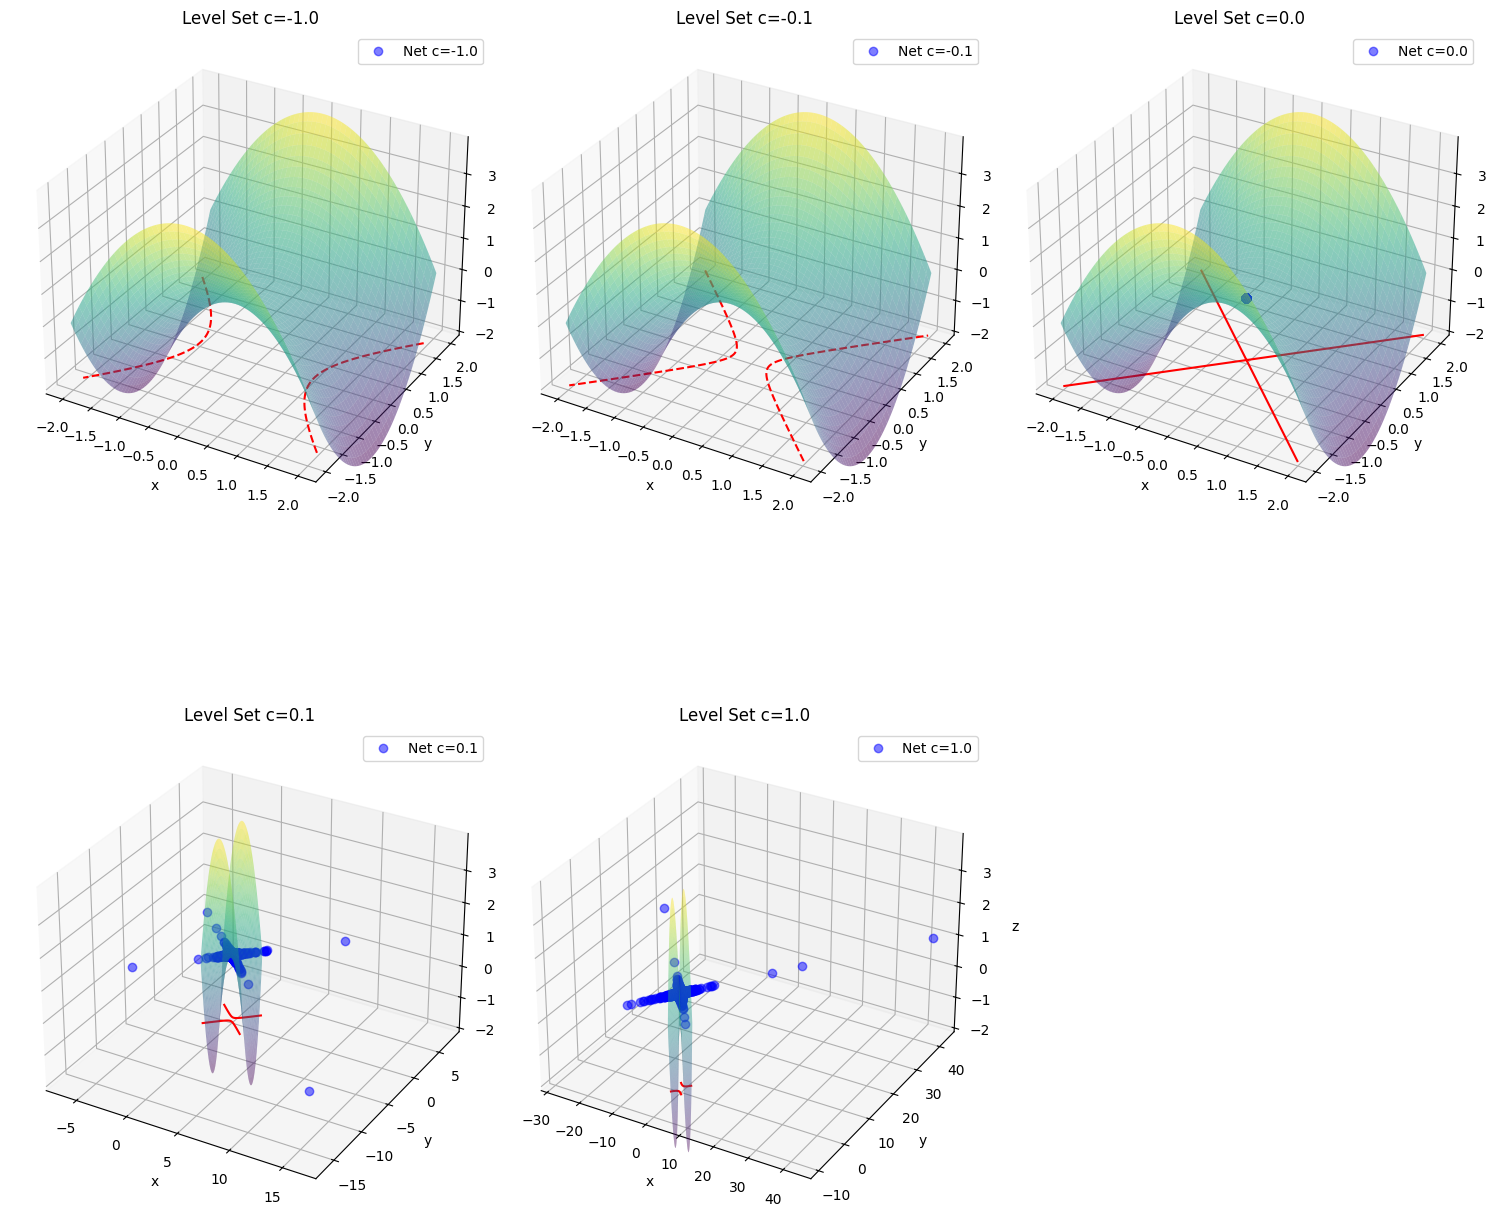

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define a Morse function with two critical points: a saddle point and a maximum
def morse_function(x, y):
    return -x**2 + y**2  # Saddle at (0,0) and max at (+inf, 0) and (-inf, 0)

# Function to generate points for the sweeping net at level set c
def sweeping_net_2d(g, c, num_points=1000):
    points = []
    for _ in range(num_points):
        # We'll consider directions in [-1, 1] for both x and y for simplicity
        direction = np.random.uniform(-1, 1, 2)
        direction /= np.linalg.norm(direction)  # Normalize to unit vector

        # Solve for r where g(r*x, r*y) = c
        try:
            r = np.sqrt(c / np.abs(g(direction[0], direction[1])))
            point = r * direction
            points.append(point)
        except ZeroDivisionError:
            continue  # Skip if division by zero occurs due to singularity
    return np.array(points)

# Generate grid for visualization
x = np.linspace(-2, 2, 200)
y = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(x, y)
Z = morse_function(X, Y)

# Choose several levels around the critical point to see topology changes
levels = np.array([-1, -0.1, 0, 0.1, 1])

# Plotting
fig = plt.figure(figsize=(15, 15))

for i, c in enumerate(levels):
    ax = fig.add_subplot(2, 3, i + 1, projection='3d')

    # Surface plot of the Morse function
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)

    # Contour where Z = c
    contour = ax.contour(X, Y, Z, levels=[c], zdir='z', offset=-2, colors='r')
    ax.set_zlim(-2, max(Z.max(), 2))  # Set Z limit to show contour

    # Sweeping net for the level set
    net_points = sweeping_net_2d(morse_function, c)
    ax.plot(net_points[:, 0], net_points[:, 1], np.full(len(net_points), c), 'bo', alpha=0.5, label=f'Net c={c}')

    ax.set_title(f'Level Set c={c}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    # Add legend
    ax.legend()

# Adjusting subplots layout
plt.tight_layout()
plt.show()

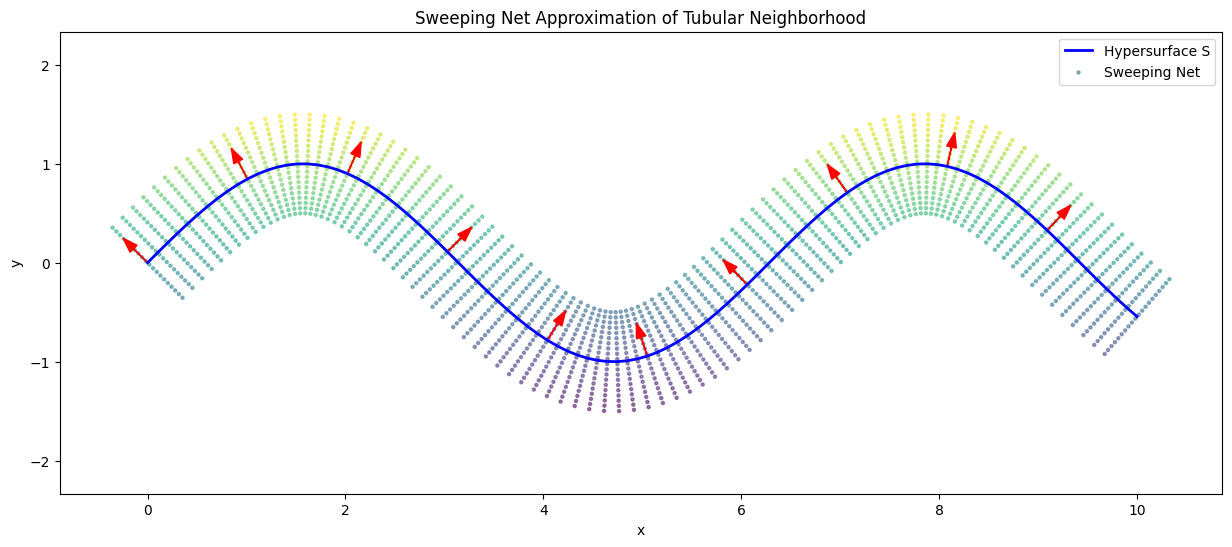

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define a simple curve (sinusoidal) as our hypersurface S
def curve(t):
    return t, np.sin(t)

# Generate points on the curve
t = np.linspace(0, 10, 100)
x, y = curve(t)

# Compute normal vectors for each point on the curve
dx_dt = np.gradient(x)
dy_dt = np.gradient(y)
normals = np.column_stack((-dy_dt, dx_dt))  # Normal is (-dy/dt, dx/dt) for (x, y)
normals /= np.linalg.norm(normals, axis=1, keepdims=True)

# Sweeping Net to approximate tubular neighborhood
def sweeping_net(crv, normal, epsilon):
    points = []
    for i in range(len(crv)):
        for r in np.linspace(-epsilon, epsilon, 20):  # Generate points at different distances
            # Ensure we're adding vectors of the same shape
            point = crv[i] + r * normal[i]
            points.append(point)
    return np.array(points)

# Small epsilon for tubular neighborhood approximation
epsilon = 0.5

# Generate sweeping net points
net_points = sweeping_net(np.column_stack((x, y)), normals, epsilon)

# Plotting
plt.figure(figsize=(15, 6))

# Plot the curve
plt.plot(x, y, 'b-', lw=2, label='Hypersurface S')

# Plot the sweeping net points
plt.scatter(net_points[:, 0], net_points[:, 1], c=net_points[:, 1], cmap='viridis', s=5, alpha=0.5, label='Sweeping Net')

# For a visual of the normal vectors (optional)
for i in range(0, len(x), 10):
    plt.arrow(x[i], y[i], normals[i, 0]*0.2, normals[i, 1]*0.2, head_width=0.1, fc='r', ec='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Sweeping Net Approximation of Tubular Neighborhood')
plt.legend()
plt.axis('equal')
plt.show()

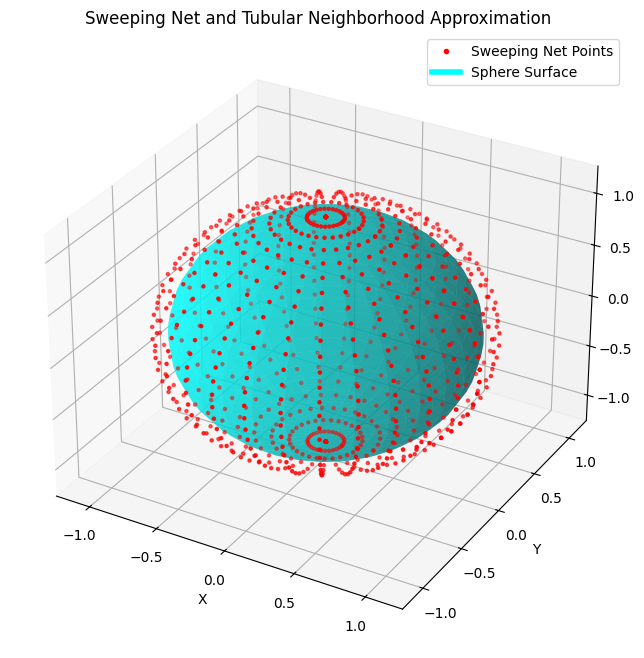

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def sphere_surface(u, v, radius=1.0):
    """Parametric function of a sphere surface."""
    x = radius * np.sin(u) * np.cos(v)
    y = radius * np.sin(u) * np.sin(v)
    z = radius * np.cos(u)
    return x, y, z

def normal_vectors(x, y, z):
    """Compute approximate normals to the sphere surface."""
    norm = np.sqrt(x**2 + y**2 + z**2)
    return x / norm, y / norm, z / norm

def construct_sweeping_net(u_range, v_range, radius=1.0, r=0.1):
    """Construct a sweeping net using normals on a sphere."""
    U, V = np.meshgrid(u_range, v_range)
    X, Y, Z = sphere_surface(U, V, radius)
    Nx, Ny, Nz = normal_vectors(X, Y, Z)

    # Apply sweeping net by modifying position with normal vectors
    net_X = (1 + r) * X
    net_Y = (1 + r) * Y
    net_Z = (1 + r) * Z

    return X, Y, Z, net_X, net_Y, net_Z

def plot_sweeping_net(X, Y, Z, net_X, net_Y, net_Z):
    """Plot the hypersurface and the sweeping net."""
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    surface = ax.plot_surface(X, Y, Z, color='cyan', alpha=0.6)
    net_points = ax.scatter(net_X, net_Y, net_Z, color='r', s=5, label='Sweeping Net Points')

    # Manually create legend with proxies
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Sweeping Net Points', markerfacecolor='r', markersize=5),
                       plt.Line2D([0], [0], color='cyan', lw=4, label='Sphere Surface')]
    ax.legend(handles=legend_elements, loc='upper right')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Sweeping Net and Tubular Neighborhood Approximation')
    plt.show()

def main():
    # Define ranges for parameters u and v
    u_range = np.linspace(0, np.pi, 30)  # From 0 to pi
    v_range = np.linspace(0, 2 * np.pi, 30)  # From 0 to 2*pi
    radius = 1.0  # Radius of the sphere
    normal_distance = 0.1  # Distance to move along normals for sweeping net

    X, Y, Z, net_X, net_Y, net_Z = construct_sweeping_net(u_range, v_range, radius, normal_distance)
    plot_sweeping_net(X, Y, Z, net_X, net_Y, net_Z)

if __name__ == "__main__":
    main()

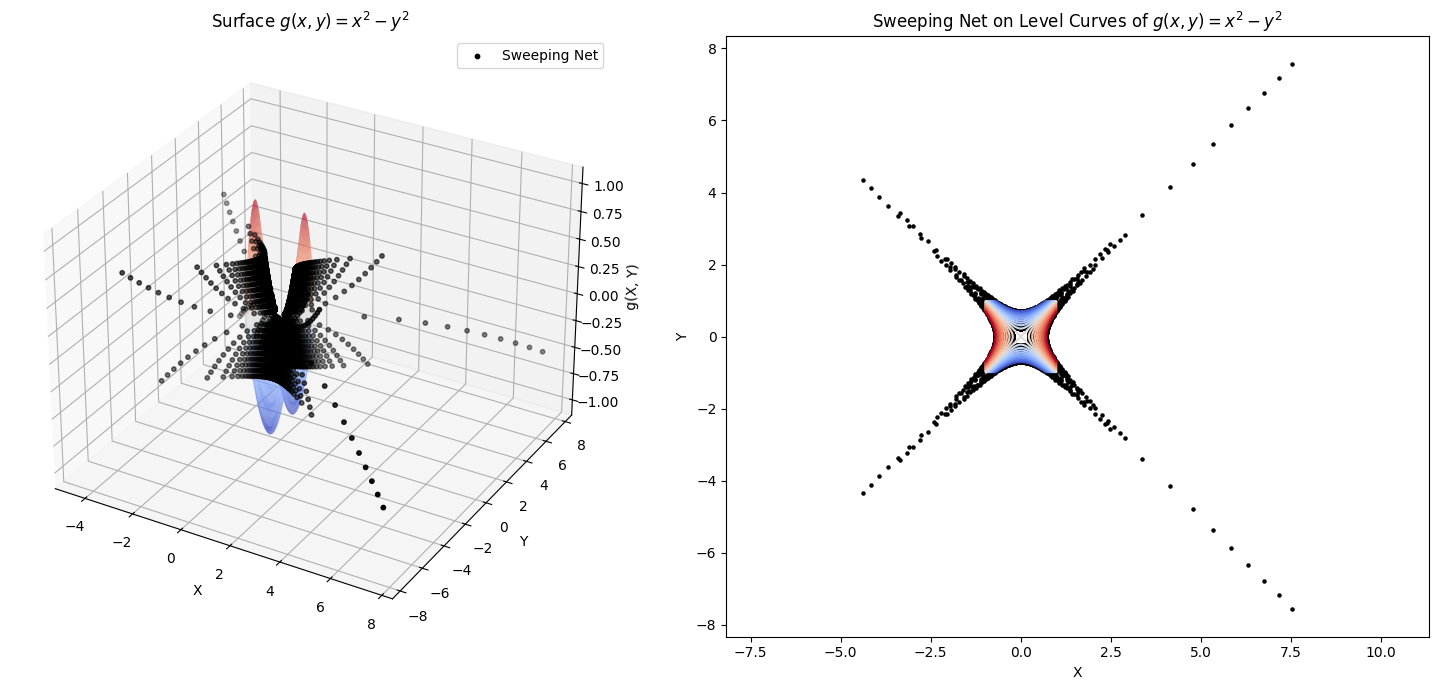

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Step 1: Define the function g(x, y) = x^2 - y^2
def g(x, y):
    return x**2 - y**2

# Step 2: Compute the Hessian matrix at (0, 0)
# Already computed:
# H_g = [[2, 0], [0, -2]]
lambda1 = 2
lambda2 = -2
# Eigenvectors are along x and y axes

# Step 3: Construct the sweeping net
# Parameters
c_values = np.linspace(-0.5, 0.5, 21)  # Levels of c (excluding c = 0)
theta = np.linspace(0, 2 * np.pi, 360)  # Angles for directions v

# Initialize lists to store net points
net_x = []
net_y = []

for c in c_values:
    # Avoid c = 0 to prevent division by zero
    if c == 0:
        continue
    r = []
    valid_theta = []
    for th in theta:
        denom = lambda1 * np.cos(th)**2 + lambda2 * np.sin(th)**2
        # Check if denom is positive, and c / denom > 0 to ensure r is real
        if denom != 0 and c * denom > 0:
            r_th = np.sqrt(2 * c / denom)
            r.append(r_th)
            valid_theta.append(th)
    # Convert polar coordinates back to Cartesian
    x_c = np.array(r) * np.cos(valid_theta)
    y_c = np.array(r) * np.sin(valid_theta)
    net_x.extend(x_c)
    net_y.extend(y_c)

# Step 4: Visualize the surface and the sweeping net

# Create a grid for plotting the surface
x_range = np.linspace(-1, 1, 200)
y_range = np.linspace(-1, 1, 200)
X, Y = np.meshgrid(x_range, y_range)
Z = g(X, Y)

# Plotting
fig = plt.figure(figsize=(15, 7))

# Plot surface
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.8)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('g(X, Y)')
ax1.set_title('Surface $g(x, y) = x^2 - y^2$')
ax1.view_init(elev=30, azim=-60)

# Plot sweeping net over the surface
ax1.scatter(net_x, net_y, g(np.array(net_x), np.array(net_y)), color='black',
s=10, label='Sweeping Net')
ax1.legend()

# 2D Plot of sweeping net
ax2 = fig.add_subplot(1, 2, 2)
ax2.contour(X, Y, Z, levels=c_values, cmap=cm.coolwarm)
ax2.scatter(net_x, net_y, color='black', s=5)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Sweeping Net on Level Curves of $g(x, y) = x^2 - y^2$')
ax2.axis('equal')

plt.tight_layout()
plt.show()

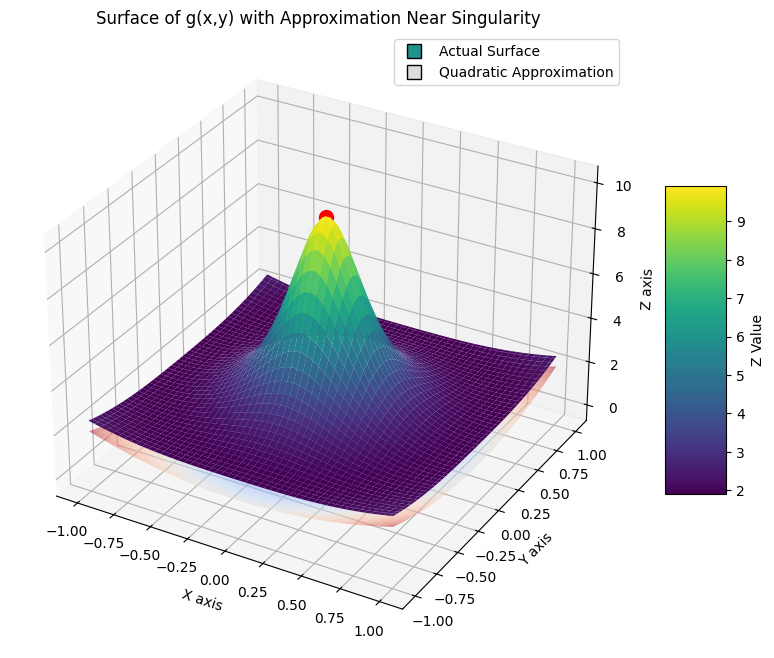

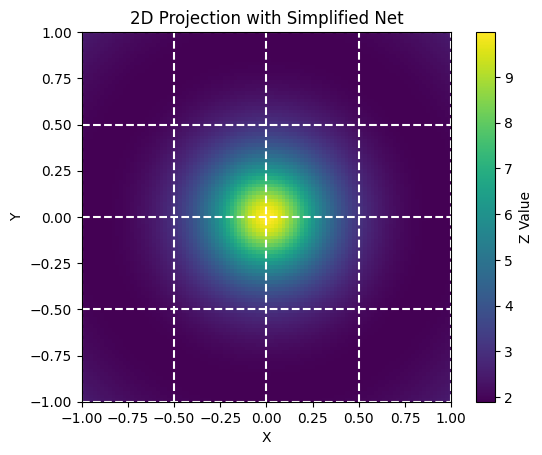

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

def g(x, y):
    return x**2 + y**2 + 1/(x**2 + y**2 + 0.1)

# Create a mesh grid for plotting
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

# Compute the function values
Z = g(X, Y)

# Create the figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface of g
surface = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Plotting the approximation using a simpler function (quadratic for example)
def f(x, y):
    return x**2 + y**2  # Simplified approximation around the singularity

Z_approx = f(X, Y)
approximation = ax.plot_surface(X, Y, Z_approx, cmap='coolwarm', alpha=0.5, edgecolor='none')

# Adding a point to represent the singularity
ax.scatter([0], [0], [g(0,0)], color='red', s=100, label='Singularity')

ax.set_title('Surface of g(x,y) with Approximation Near Singularity')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Create proxy artists for the legend
proxy_surf = Line2D([0], [0], linestyle="none", marker="s", markersize=10, markeredgecolor="black", markerfacecolor=plt.get_cmap('viridis')(0.5))
proxy_approx = Line2D([0], [0], linestyle="none", marker="s", markersize=10, markeredgecolor="black", markerfacecolor=plt.get_cmap('coolwarm')(0.5))

# Legend for clarity with proxy artists
ax.legend([proxy_surf, proxy_approx], ['Actual Surface', 'Quadratic Approximation'])

plt.colorbar(surface, shrink=0.5, aspect=5, label='Z Value')

plt.show()

# For visualizing the net, we'll create a simple 2D projection
plt.figure()
plt.imshow(Z, cmap='viridis', extent=[-1, 1, -1, 1], origin='lower')
plt.colorbar(label='Z Value')

# Drawing a simple grid to represent a net structure
for i in np.linspace(-1, 1, 5):
    plt.axvline(x=i, color='w', linestyle='--')
    plt.axhline(y=i, color='w', linestyle='--')

plt.title('2D Projection with Simplified Net')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

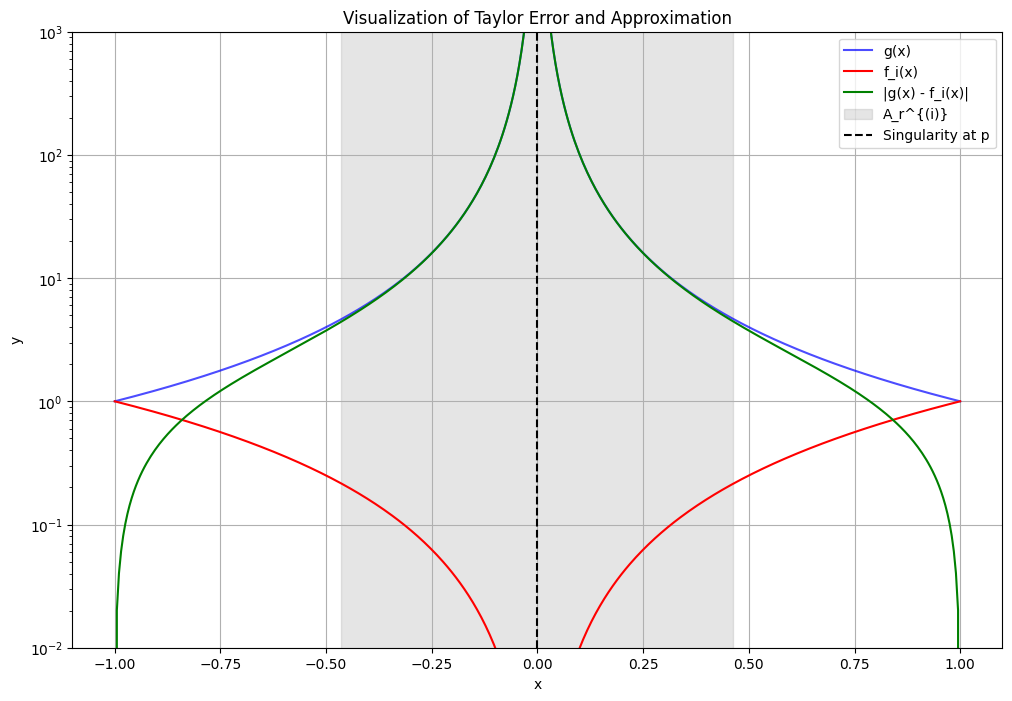

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def g(x, p=0):
    # Example function with a singularity at p=0, like 1/x^2
    # Use numpy.where for array operations
    return np.where(x != p, 1 / (x - p)**2, float('inf'))

def f_i(x, p=0, C=1):
    # Taylor expansion up to second order for g(x) around p
    return C * (x - p)**2

def error(x, p=0, C=1):
    # Error between g(x) and its approximation f_i(x)
    return abs(g(x, p) - f_i(x, p, C))

# Set up the plot
x = np.linspace(-1, 1, 400)
p = 0  # Singularity point
epsilon = 0.1  # Error tolerance
C = 1  # Adjust for approximation stability

plt.figure(figsize=(12, 8))

# Plot g(x)
plt.plot(x, g(x, p), label='g(x)', color='blue', alpha=0.7)

# Plot f_i(x)
plt.plot(x, f_i(x, p, C), label='f_i(x)', color='red')

# Plot Error
error_vals = error(x, p, C)
plt.plot(x, error_vals, label='|g(x) - f_i(x)|', color='green')

# Indicate A_r^{(i)}
delta = (epsilon / C)**(1/3)  # Assuming L = C for simplicity
A_r = np.abs(x) < delta
plt.fill_between(x, 0, np.max(error_vals), where=A_r, alpha=0.2, color='gray', label='A_r^{(i)}')

# Enhance plot
plt.axvline(x=p, color='black', linestyle='--', label='Singularity at p')
plt.legend()
plt.title('Visualization of Taylor Error and Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.yscale('log')  # Log scale might help visualize near singularities better
plt.ylim(1e-2, 1e3)  # Limit y-axis for better visualization
plt.grid(True)
plt.show()

In [28]:
import numpy as np

# Install numdifftools if not installed
!pip install numdifftools

from numdifftools import Hessian

def quadratic_approximation(g, x0):
    """
    Compute the quadratic approximation of function g at point x0.

    :param g: Function to approximate
    :param x0: Point of approximation
    :return: Hessian matrix at x0
    """
    return Hessian(g)(x0)

def diagonalize_hessian(H):
    """
    Diagonalize the Hessian matrix.

    :param H: Hessian matrix
    :return: Q (eigenvectors), Lambda (eigenvalues)
    """
    from scipy.linalg import eigh
    eigenvalues, eigenvectors = eigh(H)
    return eigenvectors, np.diag(eigenvalues)

def transform_coordinates(x, Q, x0):
    """
    Transform coordinates from x to y = Q^T(x - x0).

    :param x: Original coordinates
    :param Q: Orthogonal matrix from diagonalization
    :param x0: Point of singularity
    :return: Transformed coordinates y
    """
    return np.dot(Q.T, (x - x0))

def scale_to_isotropic(y, Lambda):
    """
    Scale coordinates to make the mapping isotropic.

    :param y: Coordinates in eigenvector basis
    :param Lambda: Diagonal matrix of eigenvalues
    :return: Scaled coordinates z
    """
    return np.array([y_i / np.sqrt(np.abs(lambda_i)) for y_i, lambda_i in zip(y, np.diag(Lambda))])

def adjust_for_conformality(z, Lambda):
    """
    Adjust scaling to ensure conformality.

    :param z: Scaled coordinates
    :param Lambda: Diagonal matrix of eigenvalues
    :return: Adjusted coordinates z_tilde
    """
    lambda_min = min(np.abs(np.diag(Lambda)))
    return np.array([np.sqrt(lambda_min / np.abs(lambda_i)) * z_i for z_i, lambda_i in zip(z, np.diag(Lambda))])

# Example usage:
def example_function(x):
    return x[0]**2 + x[1]**2 - x[0]*x[1]  # A simple quadratic form

# Point of singularity
x0 = np.array([0, 0])

# Step 1: Compute Hessian at x0
H = quadratic_approximation(example_function, x0)

# Step 2: Diagonalize the Hessian
Q, Lambda = diagonalize_hessian(H)

# Suppose we have a point x near x0
x = np.array([0.1, 0.1])

# Step 3: Transform x to y
y = transform_coordinates(x, Q, x0)

# Step 4: Scale to isotropic form
z = scale_to_isotropic(y, Lambda)

# Step 6: Adjust for conformality
z_tilde = adjust_for_conformality(z, Lambda)

print("Original coordinates:", x)
print("Transformed coordinates y:", y)
print("Scaled coordinates z:", z)
print("Conformal coordinates z_tilde:", z_tilde)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 8.8 MB/s eta 0:00:00
Original coordinates: [0.1 0.1]
Transformed coordinates y: [-1.41421356e-01  1.62588398e-18]
Scaled coordinates z: [-1.41421356e-01  9.38704551e-19]
Conformal coordinates z_tilde: [-1.41421356e-01  5.41961325e-19]


<ipython-input-29-276662013bce>:7: RuntimeWarning: divide by zero encountered in divide
  return np.sin(1/x) * np.exp(-x**2)
<ipython-input-29-276662013bce>:7: RuntimeWarning: invalid value encountered in sin
  return np.sin(1/x) * np.exp(-x**2)


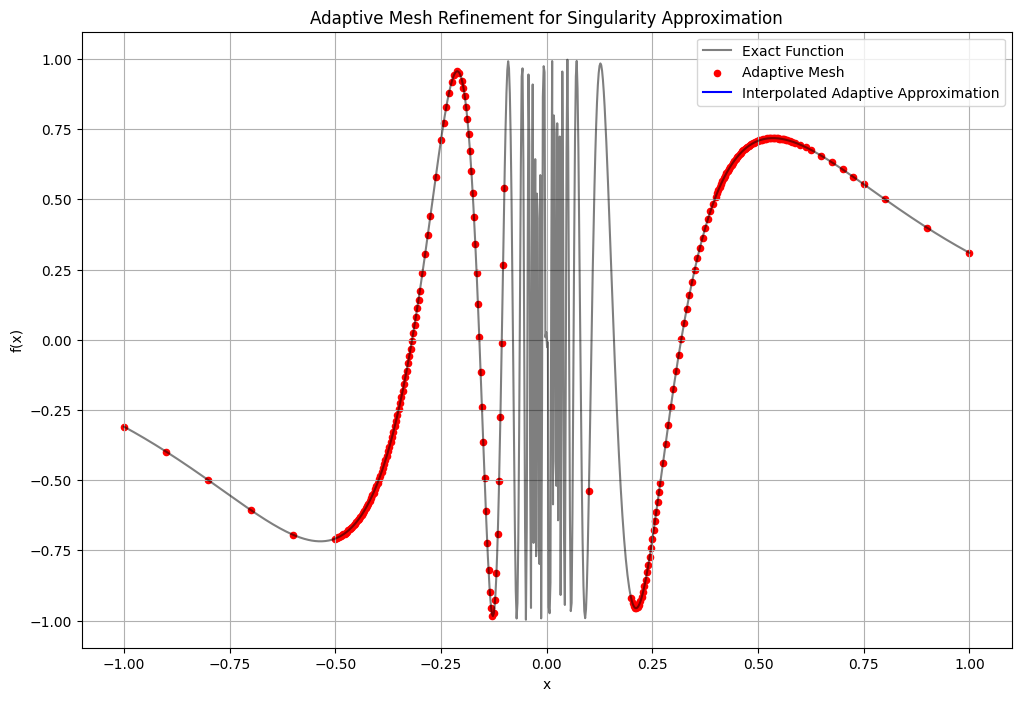

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Define a function with a singularity
def complex_function(x):
    return np.sin(1/x) * np.exp(-x**2)

# Adaptive mesh refinement function
def adaptive_mesh_refinement(f, x_range, initial_h, threshold, max_iterations=5):
    x = np.linspace(x_range[0], x_range[1], int((x_range[1] - x_range[0])/initial_h) + 1)
    y = f(x)

    for _ in range(max_iterations):
        # Calculate the second derivative (Hessian) to estimate curvature
        dx = np.diff(x)
        d2y = np.diff(y, 2) / (dx[1:] * dx[:-1])

        # Compute the error indicator
        error = np.abs(d2y)
        error_ext = np.concatenate(([error[0]], error, [error[-1]]))  # extend for boundary handling

        # Refine mesh where curvature exceeds the threshold
        to_refine = np.where(error_ext > threshold)[0]
        add_points = np.array([])

        for i in to_refine:
            new_point = (x[i+1] + x[i]) / 2
            add_points = np.append(add_points, new_point)

        x = np.sort(np.concatenate((x, add_points)))
        y = f(x)

        if len(add_points) == 0:  # No more points to add
            break

    return x, y

# Setup parameters
x_range = [-1, 1]
initial_h = 0.1
threshold = 10  # This threshold can be adjusted based on the desired accuracy

# Apply the adaptive mesh refinement
x_adaptive, y_adaptive = adaptive_mesh_refinement(complex_function, x_range, initial_h, threshold)

# Plotting
plt.figure(figsize=(12, 8))

# Plot the function with high resolution for comparison
x_fine = np.linspace(x_range[0], x_range[1], 1000)
plt.plot(x_fine, complex_function(x_fine), 'k-', label='Exact Function', alpha=0.5)

# Plot the adaptively refined approximation
plt.scatter(x_adaptive, y_adaptive, color='red', s=20, label='Adaptive Mesh')

# Use interpolation for smoother curve representation
f_interp = interp1d(x_adaptive, y_adaptive, kind='cubic')
plt.plot(x_fine, f_interp(x_fine), 'b-', label='Interpolated Adaptive Approximation')

plt.title('Adaptive Mesh Refinement for Singularity Approximation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

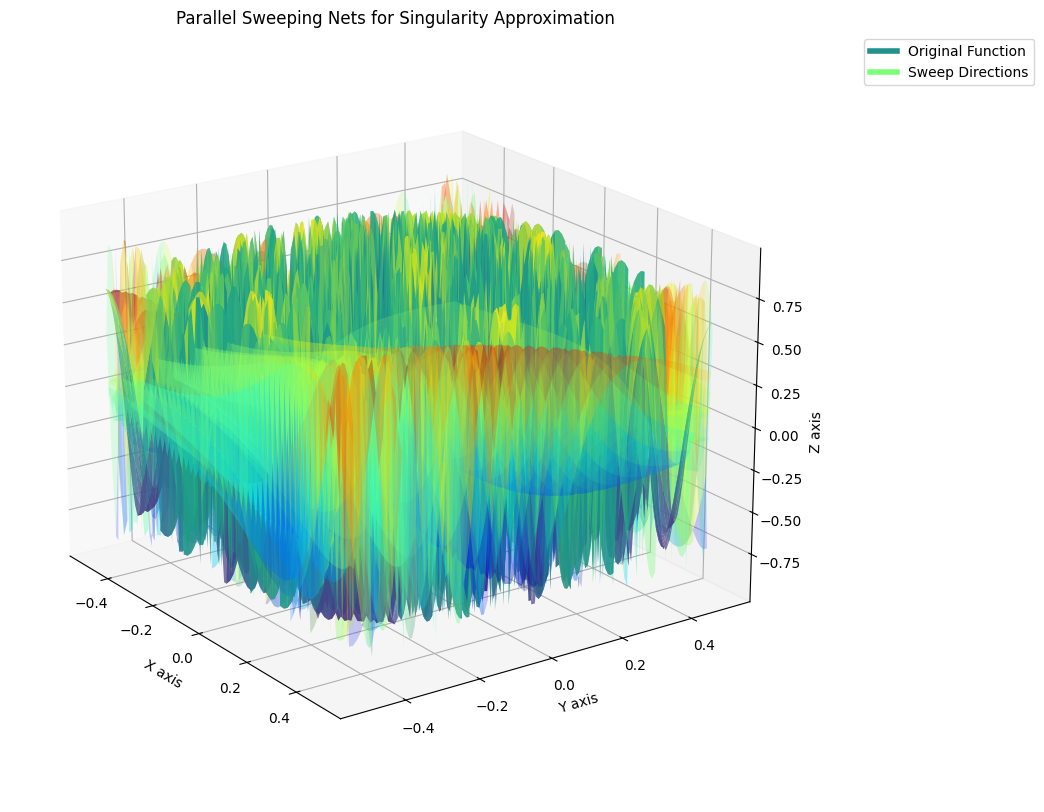

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from multiprocessing import Pool
from matplotlib.lines import Line2D
from matplotlib.colors import to_rgb

def singularity_function(x, y, epsilon=1e-6):
    return np.sin(1/(x**2 + epsilon) + 1/(y**2 + epsilon)) * np.exp(-(x**2 + y**2))

def single_direction_sweep(direction, x_range, y_range, epsilon):
    x = np.linspace(x_range[0], x_range[1], 100)
    y = np.linspace(y_range[0], y_range[1], 100)
    X, Y = np.meshgrid(x, y)
    U, V = direction[0], direction[1]

    Z = singularity_function(X + U, Y + V, epsilon)

    return (U, V), Z

def parallel_sweep(directions, x_range, y_range, epsilon):
    with Pool() as pool:
        results = pool.starmap(single_direction_sweep, [(dir, x_range, y_range, epsilon) for dir in directions])
    return results

def visualize_parallel_sweep():
    # Define a smaller range around the singularity
    x_range, y_range = (-0.5, 0.5), (-0.5, 0.5)
    epsilon = 1e-6  # Small constant to avoid division by zero

    # Use fewer directions for clarity
    theta = np.linspace(0, 2*np.pi, 8)  # 8 directions
    directions = np.column_stack([np.cos(theta), np.sin(theta)])

    results = parallel_sweep(directions, x_range, y_range, epsilon)

    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the original function
    x = np.linspace(x_range[0], x_range[1], 100)
    y = np.linspace(y_range[0], y_range[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = singularity_function(X, Y, epsilon)
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

    # Plot each sweep direction with lower opacity
    for ((U, V), Z_sweep) in results:
        ax.plot_surface(X, Y, Z_sweep, cmap='jet', alpha=0.2)  # Lower alpha

    # Adjust viewing angle for better visibility
    ax.view_init(elev=20., azim=-35)

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('Parallel Sweeping Nets for Singularity Approximation')

    # Use representative colors from the colormaps for the legend
    viridis_color = to_rgb(plt.get_cmap('viridis')(0.5))
    jet_color = to_rgb(plt.get_cmap('jet')(0.5))

    # Create a custom legend
    custom_lines = [Line2D([0], [0], color=viridis_color, lw=4),
                    Line2D([0], [0], color=jet_color, lw=4)]
    ax.legend(custom_lines, ['Original Function', 'Sweep Directions'], bbox_to_anchor=(1.1, 1), loc='upper left')

    plt.show()

# Run the visualization
visualize_parallel_sweep()